In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [61]:
df = pd.read_excel('Energy Efficiency.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,NaN,NaN
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,NaN,NaN
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,NaN,NaN
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,NaN,NaN


In [62]:
df.drop(['Unnamed: 10','Unnamed: 11'], axis=1, inplace=True)

In [63]:
columns = ['relative compactness', 'surface area', 'wall area', 'roofarea', 'overall height', 'orientation', 'glazing area', 'glazing area distribution', 'heating load', 'cooling load']
df.columns = columns

In [64]:
df

,relative compactness,surface area,wall area,roofarea,overall height,orientation,glazing area,glazing area distribution,heating load,cooling load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [65]:
# overall height looks like a categorical variable with two values:
df['overall height'].value_counts()

3.5    384
7.0    384
Name: overall height, dtype: int64

# Checking null values

In [66]:
df.isnull().sum()

relative compactness         0
surface area                 0
wall area                    0
roofarea                     0
overall height               0
orientation                  0
glazing area                 0
glazing area distribution    0
heating load                 0
cooling load                 0
dtype: int64

- Good there are no null values present in the data.

In [67]:
# Checking duplicate values
df[df.duplicated()]

,relative compactness,surface area,wall area,roofarea,overall height,orientation,glazing area,glazing area distribution,heating load,cooling load


- There are no duplicate values

In [68]:
df.describe()

,relative compactness,surface area,wall area,roofarea,overall height,orientation,glazing area,glazing area distribution,heating load,cooling load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative compactness       768 non-null    float64
 1   surface area               768 non-null    float64
 2   wall area                  768 non-null    float64
 3   roofarea                   768 non-null    float64
 4   overall height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing area               768 non-null    float64
 7   glazing area distribution  768 non-null    int64  
 8   heating load               768 non-null    float64
 9   cooling load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [11]:
df['overall height'] = df['overall height'].astype('O')
df['orientation'] = df['orientation'].astype('O')
df['glazing area'] = df['glazing area'].astype('O')
#df['glazing area distribution'] = df['glazing area distribution'].astype('O')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative compactness       768 non-null    float64
 1   surface area               768 non-null    float64
 2   wall area                  768 non-null    float64
 3   roofarea                   768 non-null    float64
 4   overall height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing area               768 non-null    float64
 7   glazing area distribution  768 non-null    int64  
 8   heating load               768 non-null    float64
 9   cooling load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [13]:
### One-Hot Encodng for categorical features:
df = pd.get_dummies(df, drop_first = True)
df.head()

,relative compactness,surface area,wall area,roofarea,glazing area distribution,heating load,cooling load,overall height_7.0,orientation_3,orientation_4,orientation_5,glazing area_0.1,glazing area_0.25,glazing area_0.4
0,0.98,514.5,294.0,110.25,0,15.55,21.33,1,0,0,0,0,0,0
1,0.98,514.5,294.0,110.25,0,15.55,21.33,1,1,0,0,0,0,0
2,0.98,514.5,294.0,110.25,0,15.55,21.33,1,0,1,0,0,0,0
3,0.98,514.5,294.0,110.25,0,15.55,21.33,1,0,0,1,0,0,0
4,0.90,563.5,318.5,122.50,0,20.84,28.28,1,0,0,0,0,0,0


In [12]:
q1 = np.percentile(a=df, q=0.25, axis=0)
q3 = np.percentile(a=df, q=0.75, axis=0)
iqr = q3 - q1
iqr

array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.3434  , 0.424925])

## Correlation Matrix

<AxesSubplot:>

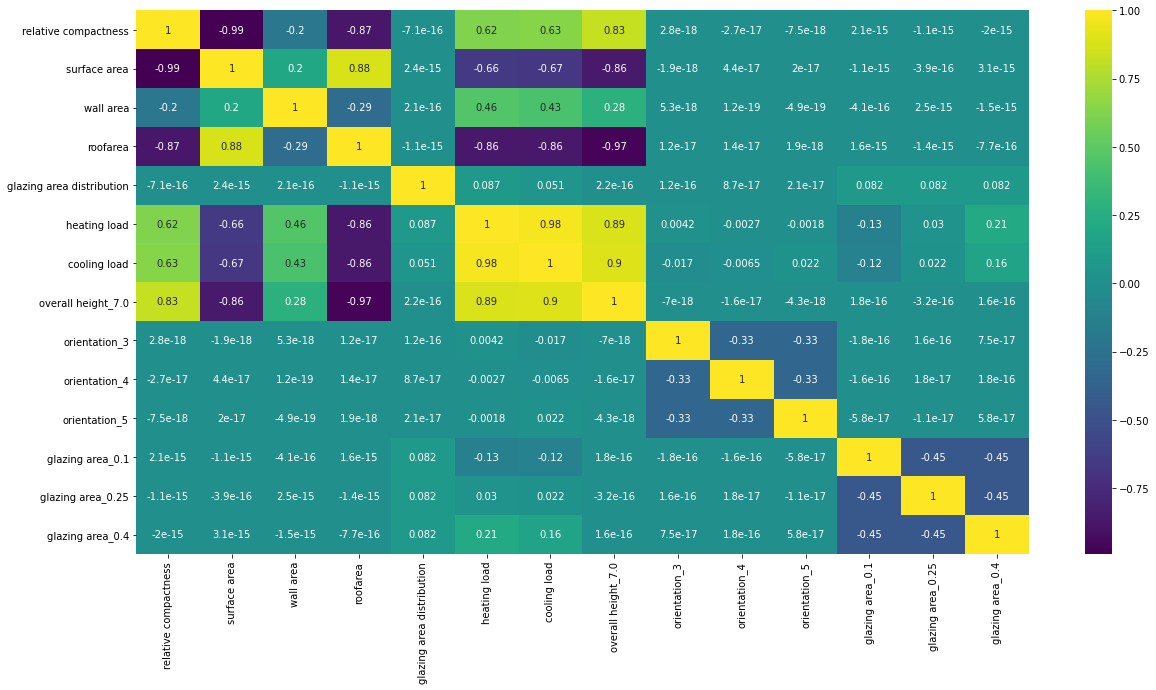

In [15]:
# Finding Correlation among features and target
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

### Keys findouts:
- `relative compactness` is highly negatively correlated with `surface area` and `roofarea`, highly positively correlated with `overall height` and moderately positively correlated with `heating load` and `cooling load`.
- `surface area` is highly negatively correlated with `relative compactness` and `overall height`, highly positively correlated with `roofarea` and moderately negatively correlated with `heating load` and `cooling load`.
- `wall area` is weakly negatively correlated with `relative compactness` and `roofarea`, weakly positively correlated with `surface area` and `overall height` and low positively correlated with `heating load` and `cooling load`.
- `roof area` is highly negatively correlated with `realtive compactness`, `overall height`, `heating load` and `cooling load`, highly positively correlated with `surface area` and weakly correlated with `wall area`.
- `overall height` is highly negatively correlated with `surface area` and `roofarea`, highly positively correlated with `relative compactness`, `heating load` and `cooling load` and weakly correlated to `wall area`.
- `orientation` are not at all correlated with features and target.
- `glazing area` is weakly correlated with `glazing area distribution`, `heating load` and `cooling load`.
- `glazing area distribution` is weakly correlated with `glazing area`.
- `heating load` is highly positively correlated with `overall height` and `cooling load`, highly negatively correlated with `roofarea`, weakly positively correlated with `glazing area`, moderately negatively correlated with `surface area`, moderately positively correlated with `relative compactness` and low correlation with `wall area`.
- `cooling load` is highly positively correlated with `overall height` and `heating load`, highly negatively correlated with `roofarea`, moderately negatively correlated with `surface area`, moderately positively correlated with `relative compactness`, low correlation with `wall area` and weakly correlated with `glazing area`.

## EDA

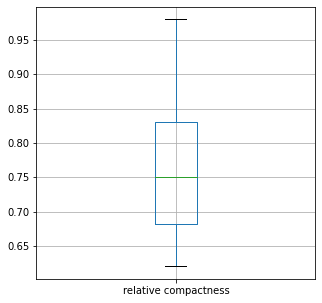

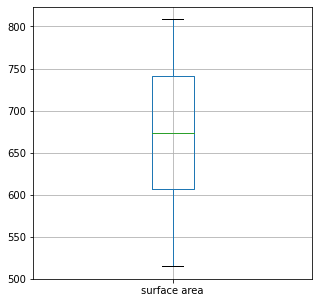

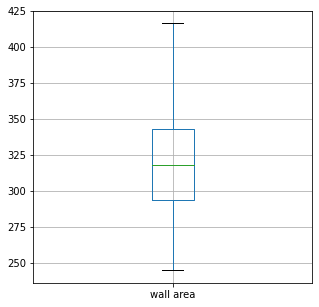

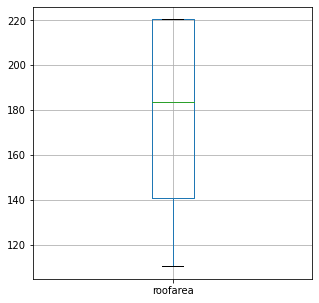

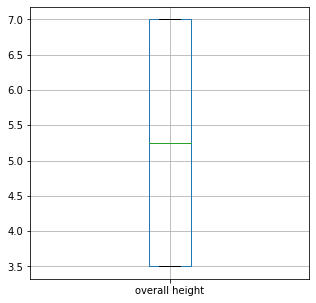

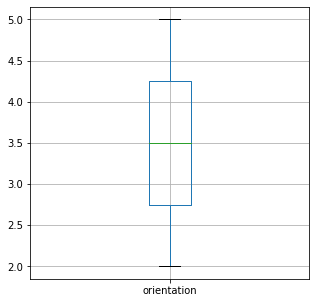

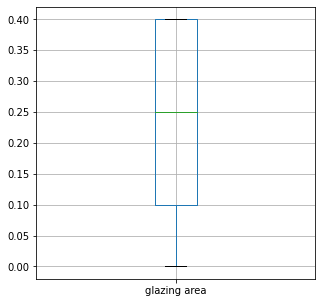

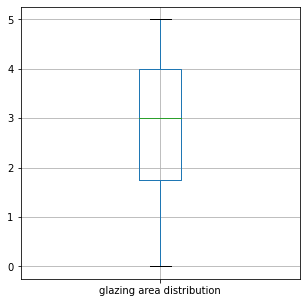

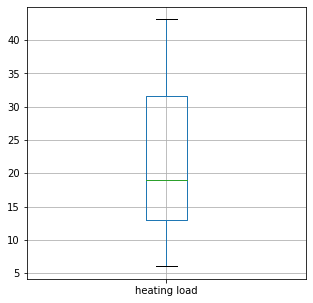

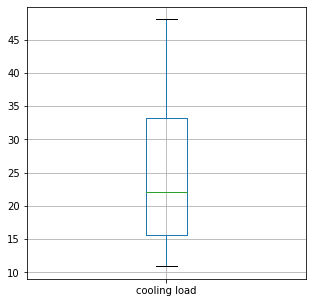

In [79]:
# Box plot of each features:
for i in df:
    plt.figure(figsize=(5,5))
    df.boxplot([i])

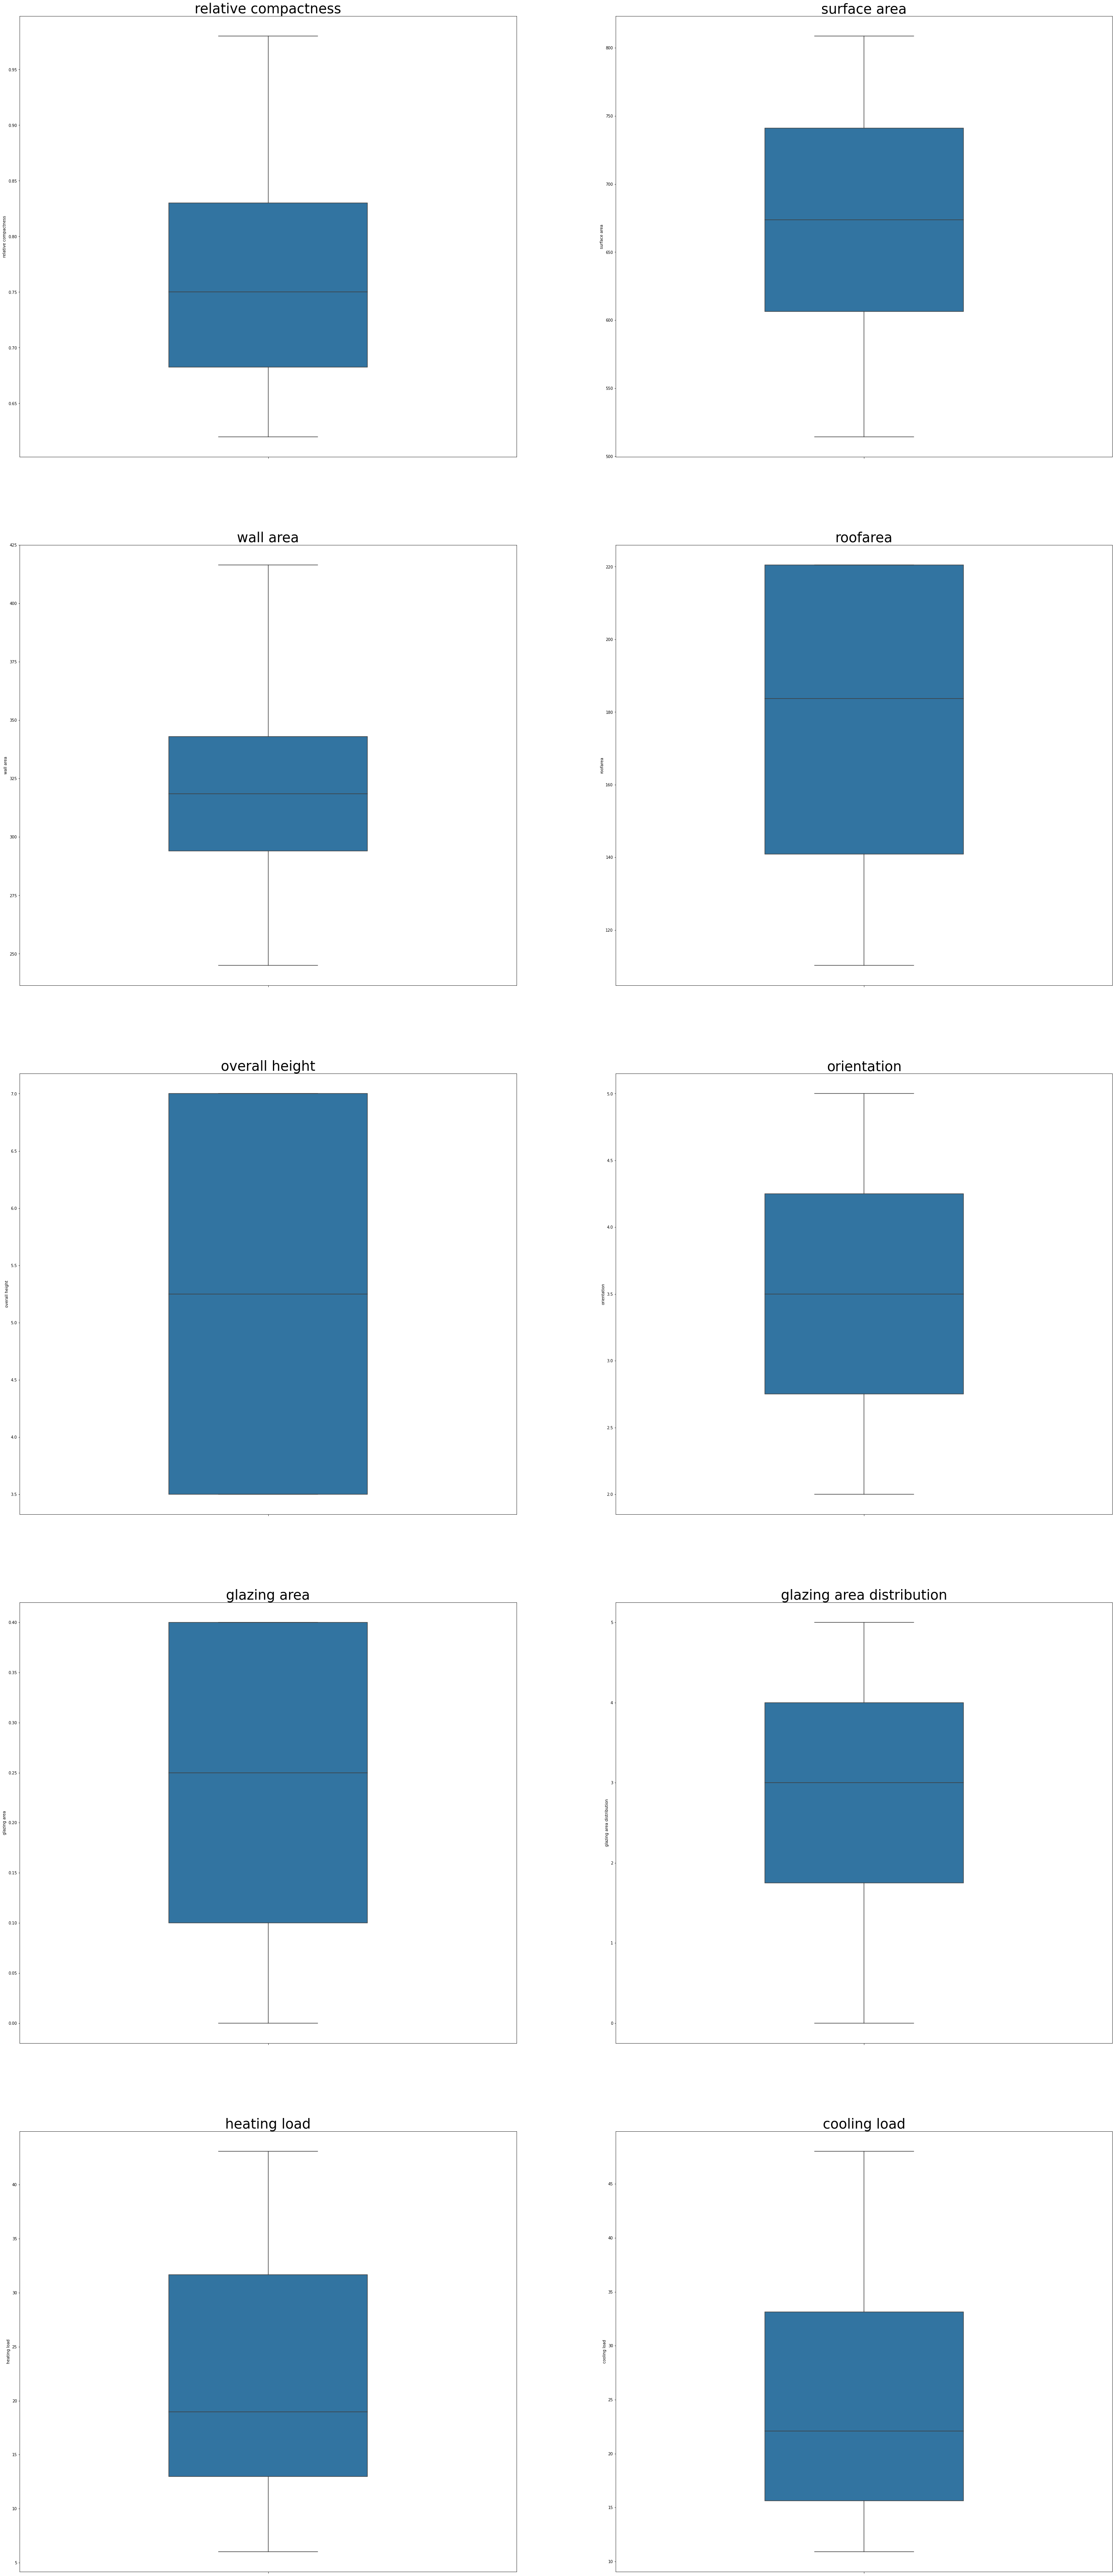

In [109]:
# box plots for better visualisation
energyeff_arr = np.reshape(df.columns[0:10], (5,2))
f, axes = plt.subplots(5, 2, figsize=(50, 120))

for i, energyeff_row in enumerate(energyeff_arr):
    for j, energyeff in enumerate(energyeff_row):
        sns.boxplot(y=energyeff, data=df, ax=axes[i][j], width=0.4)
        axes[i][j].set_title(energyeff, fontsize = 35)

- None of the features have outliers, which helps in model builiding and understanding. 

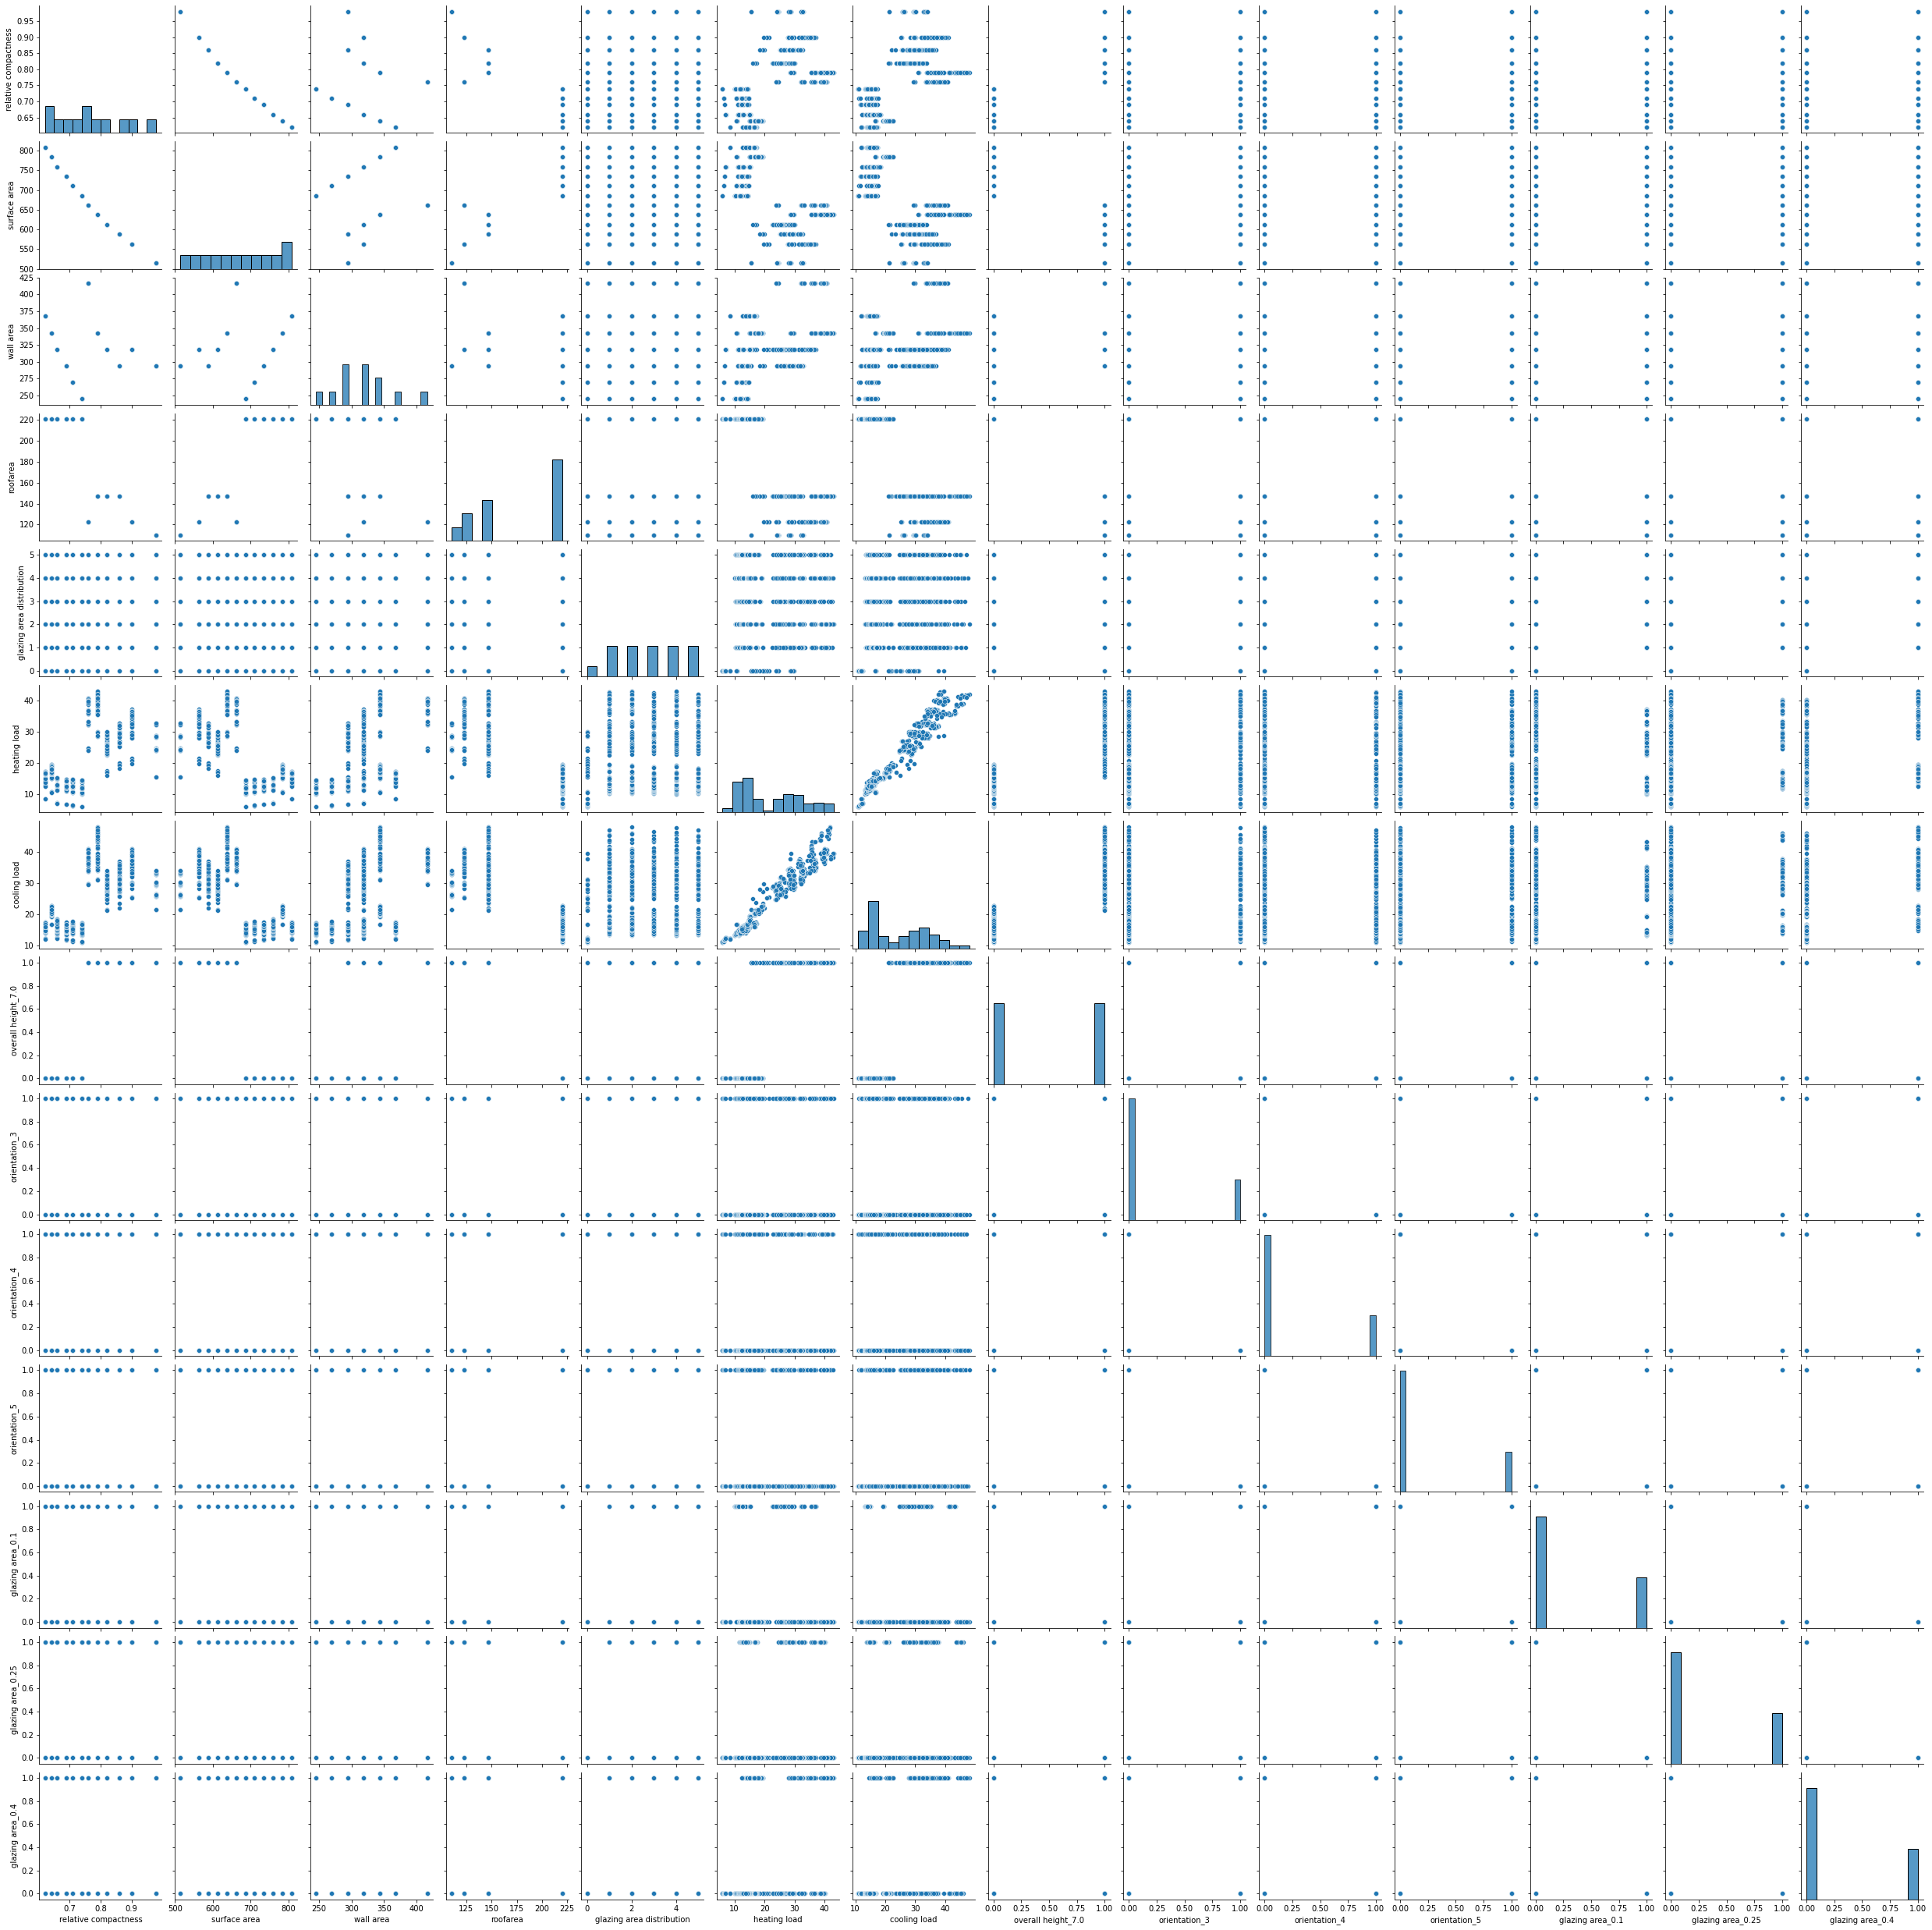

In [16]:
# paitplot to find out patterns in the data
sns.pairplot(df)

<AxesSubplot:xlabel='relative compactness', ylabel='surface area'>

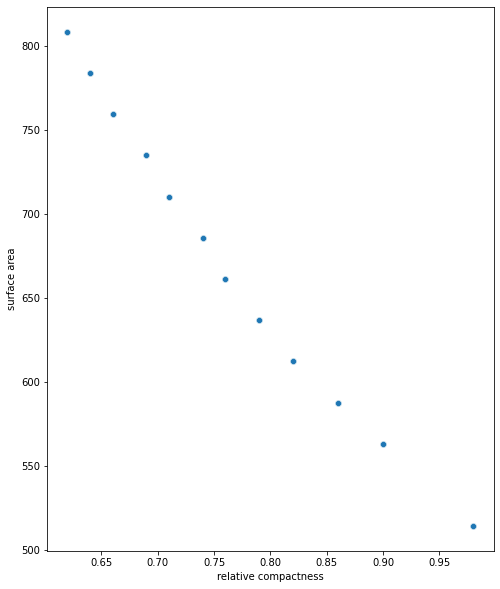

In [87]:
# Let's check scatterplot for 'relative compactness' and 'surface area'
sns.scatterplot(x = df['relative compactness'], y = df['surface area'])

- We can see that there is a huge correlation between them so we can go with one of them to avoid multicollinearity effect.

<AxesSubplot:xlabel='heating load', ylabel='cooling load'>

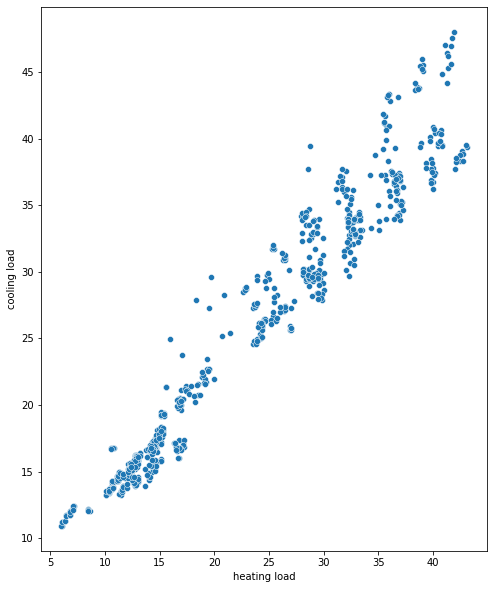

In [88]:
# Let's check scatterplot for 'heating load' and 'cooling load'
sns.scatterplot(x = df['heating load'], y = df['cooling load'])

- We can see that there is a huge correlation between them so we can go with one of them to avoid multicollinearity effect.

<AxesSubplot:xlabel='cooling load', ylabel='overall height'>

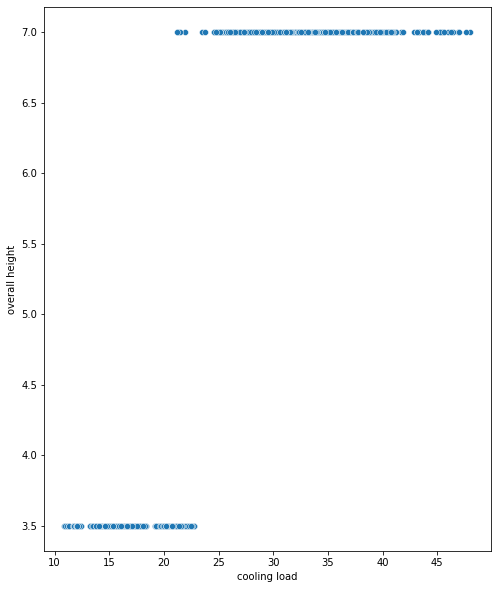

In [89]:
# Let's check scatterplot for 'cooling load' and 'overall height'
sns.scatterplot(x = df['cooling load'], y = df['overall height'])

- We can see that 'overall height has only two values '3.5 and 7.0' and is highly correlated with 'cooling load we can eliminate to remove Multicollinearity.

<AxesSubplot:xlabel='overall height', ylabel='roofarea'>

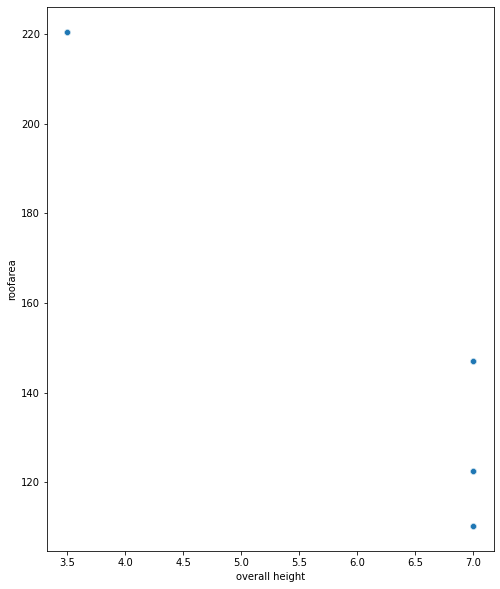

In [97]:
# let's check scatterplot for 'overall height' and 'roofarea'
sns.scatterplot(x = df['overall height'], y = df['roofarea'])

- We can see that they are highly negatively correlated so, we can eliminate one of them to reduce Multicollinearity.

In [22]:
# corr_matrix = df.corr().abs()
# high_corr_var=np.where(corr_matrix>0.8)
# high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
# high_corr_var

[('relative compactness', 'surface area'),
 ('relative compactness', 'roofarea'),
 ('relative compactness', 'overall height'),
 ('surface area', 'roofarea'),
 ('surface area', 'overall height'),
 ('roofarea', 'overall height'),
 ('roofarea', 'heating load'),
 ('roofarea', 'cooling load'),
 ('overall height', 'heating load'),
 ('overall height', 'cooling load'),
 ('heating load', 'cooling load')]

### Analysis w.r.t heating load

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [121]:
X = df.drop(['heating load', 'cooling load'], axis=1)
y = df['heating load']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [73]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [74]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('LINEARSVR', LinearSVR()))

In [75]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -8.867940 (1.296891)
LASSO: -21.009786 (5.024108)
RIDGE: -9.168315 (1.248459)
EN: -19.688262 (4.524476)
KNN: -6.832986 (1.941923)
CART: -0.331576 (0.068107)
SVR: -31.953190 (6.088148)


c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\sv

LINEARSVR: -45.090762 (48.072382)


c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


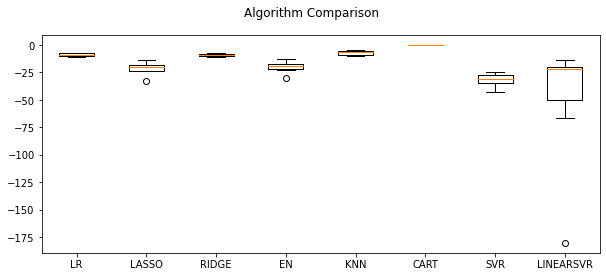

In [76]:
# Compare Algorithms
fig = plt.figure(figsize=(10,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [77]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE',
Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledLINEARSVR', Pipeline([('Scaler', StandardScaler()),('LINEARSVR',
LinearSVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: -9.168196 (1.378018)
ScaledLASSO: -11.812013 (2.373521)
ScaledRIDGE: -8.778239 (1.227956)
ScaledEN: -16.852756 (3.856989)
ScaledKNN: -6.308902 (1.627349)
ScaledCART: -0.340755 (0.071360)
ScaledSVR: -8.598437 (0.993028)
ScaledLINEARSVR: -9.116429 (1.788711)


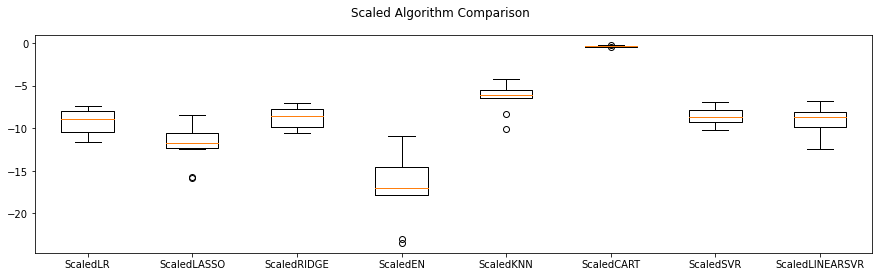

In [78]:
# Compare Algorithms
fig = plt.figure(figsize=(15, 4))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Bagging and Boosting Methods

In [102]:
# ensembles
ensembles = []
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledXGBOOST', Pipeline([('Scaler', StandardScaler()),('XGBOOST',
XGBRegressor())])))
ensembles.append(('ScaledCATBOOST', Pipeline([('Scaler', StandardScaler()),('CATBOOST',
CatBoostRegressor())])))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledRF: -0.275628 (0.061417)
ScaledET: -0.255182 (0.053605)
ScaledAB: -3.712219 (0.757565)
ScaledGBM: -0.210959 (0.030643)
ScaledXGBOOST: -0.116946 (0.028020)
Learning rate set to 0.034288
0:	learn: 9.7311853	total: 648us	remaining: 648ms
1:	learn: 9.4417090	total: 1.38ms	remaining: 689ms
2:	learn: 9.1919699	total: 1.99ms	remaining: 662ms
3:	learn: 8.9213162	total: 2.8ms	remaining: 697ms
4:	learn: 8.6922451	total: 3.22ms	remaining: 640ms
5:	learn: 8.4412985	total: 4.02ms	remaining: 665ms
6:	learn: 8.2318500	total: 4.69ms	remaining: 666ms
7:	learn: 8.0262132	total: 5.46ms	remaining: 677ms
8:	learn: 7.7880599	total: 6.18ms	remaining: 681ms
9:	learn: 7.5681634	total: 6.89ms	remaining: 682ms
10:	learn: 7.3763171	total: 7.64ms	remaining: 687ms
11:	learn: 7.1630125	total: 8.19ms	remaining: 674ms
12:	learn: 6.9888024	total: 8.79ms	remaining: 668ms
13:	learn: 6.8157362	total: 9.49ms	remaining: 669ms
14:	learn: 6.6242175	total: 10ms	remaining: 657ms
15:	learn: 6.4531842	total: 10.8ms	remainin

224:	learn: 0.4086355	total: 155ms	remaining: 534ms
225:	learn: 0.4075190	total: 156ms	remaining: 534ms
226:	learn: 0.4067185	total: 157ms	remaining: 534ms
227:	learn: 0.4055896	total: 158ms	remaining: 535ms
228:	learn: 0.4045167	total: 159ms	remaining: 535ms
229:	learn: 0.4035248	total: 160ms	remaining: 535ms
230:	learn: 0.4025600	total: 160ms	remaining: 534ms
231:	learn: 0.4017535	total: 161ms	remaining: 534ms
232:	learn: 0.4004127	total: 162ms	remaining: 534ms
233:	learn: 0.3988021	total: 163ms	remaining: 534ms
234:	learn: 0.3978587	total: 164ms	remaining: 533ms
235:	learn: 0.3968615	total: 165ms	remaining: 533ms
236:	learn: 0.3956134	total: 166ms	remaining: 534ms
237:	learn: 0.3944585	total: 167ms	remaining: 534ms
238:	learn: 0.3922374	total: 168ms	remaining: 534ms
239:	learn: 0.3907916	total: 169ms	remaining: 534ms
240:	learn: 0.3893840	total: 170ms	remaining: 535ms
241:	learn: 0.3885759	total: 171ms	remaining: 534ms
242:	learn: 0.3870024	total: 171ms	remaining: 534ms
243:	learn: 

555:	learn: 0.1974048	total: 406ms	remaining: 324ms
556:	learn: 0.1972109	total: 407ms	remaining: 324ms
557:	learn: 0.1969462	total: 408ms	remaining: 323ms
558:	learn: 0.1968249	total: 409ms	remaining: 323ms
559:	learn: 0.1965529	total: 410ms	remaining: 322ms
560:	learn: 0.1963006	total: 411ms	remaining: 321ms
561:	learn: 0.1959449	total: 412ms	remaining: 321ms
562:	learn: 0.1956465	total: 412ms	remaining: 320ms
563:	learn: 0.1954731	total: 413ms	remaining: 319ms
564:	learn: 0.1950143	total: 414ms	remaining: 319ms
565:	learn: 0.1946535	total: 415ms	remaining: 318ms
566:	learn: 0.1942127	total: 415ms	remaining: 317ms
567:	learn: 0.1939241	total: 416ms	remaining: 316ms
568:	learn: 0.1935851	total: 417ms	remaining: 316ms
569:	learn: 0.1933352	total: 417ms	remaining: 315ms
570:	learn: 0.1930979	total: 418ms	remaining: 314ms
571:	learn: 0.1927552	total: 419ms	remaining: 313ms
572:	learn: 0.1925912	total: 420ms	remaining: 313ms
573:	learn: 0.1923472	total: 420ms	remaining: 312ms
574:	learn: 

723:	learn: 0.1615459	total: 528ms	remaining: 201ms
724:	learn: 0.1614313	total: 529ms	remaining: 201ms
725:	learn: 0.1613540	total: 530ms	remaining: 200ms
726:	learn: 0.1610515	total: 531ms	remaining: 200ms
727:	learn: 0.1609144	total: 533ms	remaining: 199ms
728:	learn: 0.1608284	total: 533ms	remaining: 198ms
729:	learn: 0.1605236	total: 535ms	remaining: 198ms
730:	learn: 0.1604085	total: 536ms	remaining: 197ms
731:	learn: 0.1601745	total: 537ms	remaining: 197ms
732:	learn: 0.1599926	total: 538ms	remaining: 196ms
733:	learn: 0.1597782	total: 539ms	remaining: 195ms
734:	learn: 0.1595866	total: 539ms	remaining: 194ms
735:	learn: 0.1594625	total: 540ms	remaining: 194ms
736:	learn: 0.1593119	total: 541ms	remaining: 193ms
737:	learn: 0.1591890	total: 542ms	remaining: 192ms
738:	learn: 0.1590796	total: 543ms	remaining: 192ms
739:	learn: 0.1590126	total: 544ms	remaining: 191ms
740:	learn: 0.1589079	total: 545ms	remaining: 190ms
741:	learn: 0.1587320	total: 546ms	remaining: 190ms
742:	learn: 

914:	learn: 0.1360714	total: 659ms	remaining: 61.2ms
915:	learn: 0.1359875	total: 660ms	remaining: 60.5ms
916:	learn: 0.1359589	total: 661ms	remaining: 59.8ms
917:	learn: 0.1358759	total: 662ms	remaining: 59.1ms
918:	learn: 0.1358400	total: 663ms	remaining: 58.4ms
919:	learn: 0.1357793	total: 664ms	remaining: 57.7ms
920:	learn: 0.1356287	total: 665ms	remaining: 57ms
921:	learn: 0.1355624	total: 666ms	remaining: 56.4ms
922:	learn: 0.1355069	total: 667ms	remaining: 55.6ms
923:	learn: 0.1353694	total: 668ms	remaining: 54.9ms
924:	learn: 0.1353061	total: 669ms	remaining: 54.2ms
925:	learn: 0.1352455	total: 670ms	remaining: 53.5ms
926:	learn: 0.1351772	total: 672ms	remaining: 52.9ms
927:	learn: 0.1351510	total: 672ms	remaining: 52.2ms
928:	learn: 0.1349230	total: 673ms	remaining: 51.4ms
929:	learn: 0.1348336	total: 674ms	remaining: 50.7ms
930:	learn: 0.1347641	total: 675ms	remaining: 50ms
931:	learn: 0.1347374	total: 676ms	remaining: 49.3ms
932:	learn: 0.1344978	total: 677ms	remaining: 48.6

164:	learn: 0.5340267	total: 119ms	remaining: 604ms
165:	learn: 0.5313977	total: 120ms	remaining: 604ms
166:	learn: 0.5290377	total: 121ms	remaining: 605ms
167:	learn: 0.5264033	total: 122ms	remaining: 605ms
168:	learn: 0.5245643	total: 123ms	remaining: 605ms
169:	learn: 0.5207988	total: 124ms	remaining: 604ms
170:	learn: 0.5173881	total: 125ms	remaining: 604ms
171:	learn: 0.5140406	total: 125ms	remaining: 603ms
172:	learn: 0.5112981	total: 126ms	remaining: 603ms
173:	learn: 0.5089411	total: 127ms	remaining: 602ms
174:	learn: 0.5058755	total: 128ms	remaining: 602ms
175:	learn: 0.5035104	total: 128ms	remaining: 601ms
176:	learn: 0.5013482	total: 129ms	remaining: 601ms
177:	learn: 0.4990733	total: 130ms	remaining: 601ms
178:	learn: 0.4973722	total: 131ms	remaining: 601ms
179:	learn: 0.4955990	total: 132ms	remaining: 601ms
180:	learn: 0.4936031	total: 133ms	remaining: 601ms
181:	learn: 0.4909627	total: 134ms	remaining: 600ms
182:	learn: 0.4883408	total: 134ms	remaining: 600ms
183:	learn: 

330:	learn: 0.3034229	total: 242ms	remaining: 489ms
331:	learn: 0.3029886	total: 243ms	remaining: 488ms
332:	learn: 0.3023243	total: 244ms	remaining: 488ms
333:	learn: 0.3015257	total: 245ms	remaining: 488ms
334:	learn: 0.3009418	total: 245ms	remaining: 487ms
335:	learn: 0.3003449	total: 246ms	remaining: 486ms
336:	learn: 0.2996506	total: 247ms	remaining: 485ms
337:	learn: 0.2989773	total: 247ms	remaining: 485ms
338:	learn: 0.2984918	total: 248ms	remaining: 484ms
339:	learn: 0.2979729	total: 249ms	remaining: 483ms
340:	learn: 0.2972829	total: 250ms	remaining: 482ms
341:	learn: 0.2969772	total: 251ms	remaining: 482ms
342:	learn: 0.2966846	total: 252ms	remaining: 482ms
343:	learn: 0.2960349	total: 252ms	remaining: 481ms
344:	learn: 0.2953519	total: 253ms	remaining: 481ms
345:	learn: 0.2948236	total: 254ms	remaining: 480ms
346:	learn: 0.2937150	total: 255ms	remaining: 479ms
347:	learn: 0.2929302	total: 256ms	remaining: 479ms
348:	learn: 0.2923245	total: 256ms	remaining: 478ms
349:	learn: 

499:	learn: 0.2213056	total: 367ms	remaining: 367ms
500:	learn: 0.2208115	total: 368ms	remaining: 367ms
501:	learn: 0.2203049	total: 369ms	remaining: 366ms
502:	learn: 0.2199975	total: 370ms	remaining: 366ms
503:	learn: 0.2195154	total: 371ms	remaining: 365ms
504:	learn: 0.2187423	total: 372ms	remaining: 364ms
505:	learn: 0.2184485	total: 373ms	remaining: 364ms
506:	learn: 0.2181657	total: 373ms	remaining: 363ms
507:	learn: 0.2177493	total: 374ms	remaining: 362ms
508:	learn: 0.2174563	total: 375ms	remaining: 362ms
509:	learn: 0.2171812	total: 376ms	remaining: 361ms
510:	learn: 0.2170118	total: 376ms	remaining: 360ms
511:	learn: 0.2168569	total: 377ms	remaining: 359ms
512:	learn: 0.2164892	total: 378ms	remaining: 359ms
513:	learn: 0.2160937	total: 379ms	remaining: 358ms
514:	learn: 0.2158333	total: 379ms	remaining: 357ms
515:	learn: 0.2156242	total: 380ms	remaining: 357ms
516:	learn: 0.2153150	total: 381ms	remaining: 356ms
517:	learn: 0.2145915	total: 382ms	remaining: 355ms
518:	learn: 

683:	learn: 0.1731003	total: 495ms	remaining: 229ms
684:	learn: 0.1729434	total: 496ms	remaining: 228ms
685:	learn: 0.1726897	total: 497ms	remaining: 227ms
686:	learn: 0.1726498	total: 498ms	remaining: 227ms
687:	learn: 0.1724015	total: 499ms	remaining: 226ms
688:	learn: 0.1721335	total: 500ms	remaining: 225ms
689:	learn: 0.1719541	total: 500ms	remaining: 225ms
690:	learn: 0.1718759	total: 501ms	remaining: 224ms
691:	learn: 0.1717397	total: 502ms	remaining: 223ms
692:	learn: 0.1715799	total: 503ms	remaining: 223ms
693:	learn: 0.1714084	total: 503ms	remaining: 222ms
694:	learn: 0.1710931	total: 504ms	remaining: 221ms
695:	learn: 0.1709865	total: 505ms	remaining: 221ms
696:	learn: 0.1709180	total: 506ms	remaining: 220ms
697:	learn: 0.1708472	total: 507ms	remaining: 219ms
698:	learn: 0.1706213	total: 508ms	remaining: 219ms
699:	learn: 0.1704010	total: 508ms	remaining: 218ms
700:	learn: 0.1698345	total: 509ms	remaining: 217ms
701:	learn: 0.1696642	total: 510ms	remaining: 217ms
702:	learn: 

857:	learn: 0.1444140	total: 622ms	remaining: 103ms
858:	learn: 0.1443751	total: 623ms	remaining: 102ms
859:	learn: 0.1442414	total: 624ms	remaining: 102ms
860:	learn: 0.1441226	total: 625ms	remaining: 101ms
861:	learn: 0.1440715	total: 626ms	remaining: 100ms
862:	learn: 0.1439366	total: 627ms	remaining: 99.5ms
863:	learn: 0.1438665	total: 627ms	remaining: 98.8ms
864:	learn: 0.1438029	total: 628ms	remaining: 98ms
865:	learn: 0.1437683	total: 629ms	remaining: 97.3ms
866:	learn: 0.1437085	total: 630ms	remaining: 96.6ms
867:	learn: 0.1436033	total: 630ms	remaining: 95.9ms
868:	learn: 0.1435160	total: 631ms	remaining: 95.1ms
869:	learn: 0.1434152	total: 632ms	remaining: 94.4ms
870:	learn: 0.1433330	total: 633ms	remaining: 93.7ms
871:	learn: 0.1432353	total: 634ms	remaining: 93ms
872:	learn: 0.1430663	total: 635ms	remaining: 92.3ms
873:	learn: 0.1429488	total: 635ms	remaining: 91.6ms
874:	learn: 0.1428293	total: 636ms	remaining: 90.9ms
875:	learn: 0.1426406	total: 637ms	remaining: 90.2ms
87

165:	learn: 0.5303548	total: 125ms	remaining: 630ms
166:	learn: 0.5280543	total: 126ms	remaining: 629ms
167:	learn: 0.5249814	total: 128ms	remaining: 635ms
168:	learn: 0.5215140	total: 129ms	remaining: 635ms
169:	learn: 0.5194755	total: 130ms	remaining: 634ms
170:	learn: 0.5172202	total: 131ms	remaining: 633ms
171:	learn: 0.5134976	total: 132ms	remaining: 634ms
172:	learn: 0.5118715	total: 133ms	remaining: 634ms
173:	learn: 0.5085220	total: 133ms	remaining: 634ms
174:	learn: 0.5054016	total: 135ms	remaining: 634ms
175:	learn: 0.5026568	total: 135ms	remaining: 634ms
176:	learn: 0.5003206	total: 137ms	remaining: 635ms
177:	learn: 0.4977122	total: 138ms	remaining: 635ms
178:	learn: 0.4950343	total: 139ms	remaining: 636ms
179:	learn: 0.4918994	total: 140ms	remaining: 636ms
180:	learn: 0.4905040	total: 141ms	remaining: 636ms
181:	learn: 0.4881260	total: 142ms	remaining: 638ms
182:	learn: 0.4856331	total: 143ms	remaining: 639ms
183:	learn: 0.4833219	total: 144ms	remaining: 640ms
184:	learn: 

463:	learn: 0.2328534	total: 378ms	remaining: 436ms
464:	learn: 0.2325284	total: 379ms	remaining: 436ms
465:	learn: 0.2320724	total: 380ms	remaining: 436ms
466:	learn: 0.2317041	total: 381ms	remaining: 435ms
467:	learn: 0.2310864	total: 382ms	remaining: 435ms
468:	learn: 0.2307188	total: 383ms	remaining: 434ms
469:	learn: 0.2305733	total: 384ms	remaining: 433ms
470:	learn: 0.2301602	total: 385ms	remaining: 432ms
471:	learn: 0.2296961	total: 386ms	remaining: 432ms
472:	learn: 0.2294665	total: 387ms	remaining: 431ms
473:	learn: 0.2288847	total: 388ms	remaining: 431ms
474:	learn: 0.2286253	total: 390ms	remaining: 431ms
475:	learn: 0.2283773	total: 391ms	remaining: 430ms
476:	learn: 0.2280536	total: 392ms	remaining: 430ms
477:	learn: 0.2275045	total: 393ms	remaining: 429ms
478:	learn: 0.2269736	total: 394ms	remaining: 428ms
479:	learn: 0.2265769	total: 394ms	remaining: 427ms
480:	learn: 0.2261125	total: 396ms	remaining: 427ms
481:	learn: 0.2257421	total: 397ms	remaining: 427ms
482:	learn: 

750:	learn: 0.1667448	total: 623ms	remaining: 207ms
751:	learn: 0.1666201	total: 624ms	remaining: 206ms
752:	learn: 0.1664397	total: 626ms	remaining: 205ms
753:	learn: 0.1662891	total: 627ms	remaining: 205ms
754:	learn: 0.1662207	total: 628ms	remaining: 204ms
755:	learn: 0.1660189	total: 629ms	remaining: 203ms
756:	learn: 0.1659611	total: 631ms	remaining: 202ms
757:	learn: 0.1657942	total: 632ms	remaining: 202ms
758:	learn: 0.1656907	total: 633ms	remaining: 201ms
759:	learn: 0.1654949	total: 633ms	remaining: 200ms
760:	learn: 0.1653431	total: 634ms	remaining: 199ms
761:	learn: 0.1652737	total: 635ms	remaining: 198ms
762:	learn: 0.1649302	total: 636ms	remaining: 197ms
763:	learn: 0.1647886	total: 636ms	remaining: 197ms
764:	learn: 0.1646499	total: 638ms	remaining: 196ms
765:	learn: 0.1645833	total: 638ms	remaining: 195ms
766:	learn: 0.1644175	total: 639ms	remaining: 194ms
767:	learn: 0.1642019	total: 641ms	remaining: 194ms
768:	learn: 0.1640546	total: 642ms	remaining: 193ms
769:	learn: 

976:	learn: 0.1396191	total: 869ms	remaining: 20.5ms
977:	learn: 0.1394615	total: 870ms	remaining: 19.6ms
978:	learn: 0.1394380	total: 871ms	remaining: 18.7ms
979:	learn: 0.1393399	total: 872ms	remaining: 17.8ms
980:	learn: 0.1392732	total: 874ms	remaining: 16.9ms
981:	learn: 0.1391306	total: 875ms	remaining: 16ms
982:	learn: 0.1389532	total: 877ms	remaining: 15.2ms
983:	learn: 0.1388863	total: 879ms	remaining: 14.3ms
984:	learn: 0.1388304	total: 880ms	remaining: 13.4ms
985:	learn: 0.1387970	total: 882ms	remaining: 12.5ms
986:	learn: 0.1387329	total: 883ms	remaining: 11.6ms
987:	learn: 0.1386795	total: 884ms	remaining: 10.7ms
988:	learn: 0.1386477	total: 886ms	remaining: 9.85ms
989:	learn: 0.1385507	total: 887ms	remaining: 8.96ms
990:	learn: 0.1384561	total: 888ms	remaining: 8.07ms
991:	learn: 0.1382665	total: 890ms	remaining: 7.17ms
992:	learn: 0.1381078	total: 891ms	remaining: 6.28ms
993:	learn: 0.1379220	total: 892ms	remaining: 5.39ms
994:	learn: 0.1378586	total: 894ms	remaining: 4.

155:	learn: 0.5569750	total: 120ms	remaining: 649ms
156:	learn: 0.5543862	total: 121ms	remaining: 650ms
157:	learn: 0.5507493	total: 122ms	remaining: 650ms
158:	learn: 0.5469309	total: 123ms	remaining: 650ms
159:	learn: 0.5429575	total: 124ms	remaining: 649ms
160:	learn: 0.5382412	total: 124ms	remaining: 648ms
161:	learn: 0.5352967	total: 125ms	remaining: 647ms
162:	learn: 0.5312323	total: 126ms	remaining: 645ms
163:	learn: 0.5271620	total: 126ms	remaining: 644ms
164:	learn: 0.5237951	total: 127ms	remaining: 644ms
165:	learn: 0.5214616	total: 128ms	remaining: 643ms
166:	learn: 0.5178823	total: 129ms	remaining: 641ms
167:	learn: 0.5153862	total: 129ms	remaining: 640ms
168:	learn: 0.5129774	total: 130ms	remaining: 638ms
169:	learn: 0.5098737	total: 131ms	remaining: 640ms
170:	learn: 0.5075525	total: 132ms	remaining: 640ms
171:	learn: 0.5054571	total: 133ms	remaining: 639ms
172:	learn: 0.5025293	total: 133ms	remaining: 638ms
173:	learn: 0.4995052	total: 134ms	remaining: 636ms
174:	learn: 

454:	learn: 0.2359610	total: 369ms	remaining: 442ms
455:	learn: 0.2356484	total: 370ms	remaining: 441ms
456:	learn: 0.2354843	total: 371ms	remaining: 440ms
457:	learn: 0.2351783	total: 372ms	remaining: 440ms
458:	learn: 0.2347155	total: 372ms	remaining: 439ms
459:	learn: 0.2343919	total: 373ms	remaining: 438ms
460:	learn: 0.2339809	total: 374ms	remaining: 437ms
461:	learn: 0.2334166	total: 375ms	remaining: 436ms
462:	learn: 0.2331935	total: 375ms	remaining: 435ms
463:	learn: 0.2327492	total: 376ms	remaining: 434ms
464:	learn: 0.2323614	total: 376ms	remaining: 433ms
465:	learn: 0.2319888	total: 377ms	remaining: 432ms
466:	learn: 0.2317574	total: 378ms	remaining: 431ms
467:	learn: 0.2315230	total: 380ms	remaining: 432ms
468:	learn: 0.2311482	total: 381ms	remaining: 431ms
469:	learn: 0.2307300	total: 381ms	remaining: 430ms
470:	learn: 0.2302479	total: 382ms	remaining: 429ms
471:	learn: 0.2297314	total: 383ms	remaining: 428ms
472:	learn: 0.2295689	total: 383ms	remaining: 427ms
473:	learn: 

633:	learn: 0.1872573	total: 500ms	remaining: 289ms
634:	learn: 0.1871279	total: 501ms	remaining: 288ms
635:	learn: 0.1869839	total: 502ms	remaining: 287ms
636:	learn: 0.1868803	total: 503ms	remaining: 287ms
637:	learn: 0.1861192	total: 504ms	remaining: 286ms
638:	learn: 0.1857888	total: 505ms	remaining: 285ms
639:	learn: 0.1856520	total: 506ms	remaining: 284ms
640:	learn: 0.1853708	total: 506ms	remaining: 284ms
641:	learn: 0.1852140	total: 507ms	remaining: 283ms
642:	learn: 0.1850489	total: 508ms	remaining: 282ms
643:	learn: 0.1847468	total: 509ms	remaining: 281ms
644:	learn: 0.1846433	total: 510ms	remaining: 280ms
645:	learn: 0.1844973	total: 510ms	remaining: 280ms
646:	learn: 0.1842971	total: 511ms	remaining: 279ms
647:	learn: 0.1841503	total: 513ms	remaining: 279ms
648:	learn: 0.1838181	total: 514ms	remaining: 278ms
649:	learn: 0.1836624	total: 515ms	remaining: 277ms
650:	learn: 0.1829328	total: 517ms	remaining: 277ms
651:	learn: 0.1827951	total: 518ms	remaining: 276ms
652:	learn: 

796:	learn: 0.1593724	total: 627ms	remaining: 160ms
797:	learn: 0.1591531	total: 628ms	remaining: 159ms
798:	learn: 0.1589565	total: 629ms	remaining: 158ms
799:	learn: 0.1587718	total: 629ms	remaining: 157ms
800:	learn: 0.1585695	total: 630ms	remaining: 157ms
801:	learn: 0.1584373	total: 631ms	remaining: 156ms
802:	learn: 0.1582933	total: 632ms	remaining: 155ms
803:	learn: 0.1582533	total: 632ms	remaining: 154ms
804:	learn: 0.1581534	total: 633ms	remaining: 153ms
805:	learn: 0.1579139	total: 634ms	remaining: 152ms
806:	learn: 0.1577709	total: 634ms	remaining: 152ms
807:	learn: 0.1573927	total: 635ms	remaining: 151ms
808:	learn: 0.1573434	total: 636ms	remaining: 150ms
809:	learn: 0.1571913	total: 636ms	remaining: 149ms
810:	learn: 0.1570232	total: 637ms	remaining: 148ms
811:	learn: 0.1568278	total: 638ms	remaining: 148ms
812:	learn: 0.1566810	total: 638ms	remaining: 147ms
813:	learn: 0.1565113	total: 639ms	remaining: 146ms
814:	learn: 0.1563872	total: 640ms	remaining: 145ms
815:	learn: 

973:	learn: 0.1369006	total: 751ms	remaining: 20ms
974:	learn: 0.1367458	total: 752ms	remaining: 19.3ms
975:	learn: 0.1366552	total: 753ms	remaining: 18.5ms
976:	learn: 0.1365870	total: 754ms	remaining: 17.7ms
977:	learn: 0.1364969	total: 754ms	remaining: 17ms
978:	learn: 0.1363810	total: 755ms	remaining: 16.2ms
979:	learn: 0.1363163	total: 756ms	remaining: 15.4ms
980:	learn: 0.1362413	total: 756ms	remaining: 14.6ms
981:	learn: 0.1361800	total: 757ms	remaining: 13.9ms
982:	learn: 0.1360834	total: 758ms	remaining: 13.1ms
983:	learn: 0.1359577	total: 758ms	remaining: 12.3ms
984:	learn: 0.1358832	total: 759ms	remaining: 11.6ms
985:	learn: 0.1357785	total: 760ms	remaining: 10.8ms
986:	learn: 0.1356780	total: 760ms	remaining: 10ms
987:	learn: 0.1354396	total: 761ms	remaining: 9.24ms
988:	learn: 0.1353270	total: 762ms	remaining: 8.47ms
989:	learn: 0.1353075	total: 762ms	remaining: 7.7ms
990:	learn: 0.1351464	total: 763ms	remaining: 6.93ms
991:	learn: 0.1349973	total: 764ms	remaining: 6.16ms


165:	learn: 0.5279992	total: 114ms	remaining: 574ms
166:	learn: 0.5246180	total: 115ms	remaining: 574ms
167:	learn: 0.5217308	total: 116ms	remaining: 574ms
168:	learn: 0.5189166	total: 117ms	remaining: 574ms
169:	learn: 0.5170835	total: 117ms	remaining: 574ms
170:	learn: 0.5141654	total: 118ms	remaining: 573ms
171:	learn: 0.5109963	total: 119ms	remaining: 572ms
172:	learn: 0.5081519	total: 119ms	remaining: 571ms
173:	learn: 0.5064882	total: 120ms	remaining: 570ms
174:	learn: 0.5029239	total: 121ms	remaining: 569ms
175:	learn: 0.5006193	total: 121ms	remaining: 568ms
176:	learn: 0.4976916	total: 122ms	remaining: 568ms
177:	learn: 0.4952569	total: 123ms	remaining: 567ms
178:	learn: 0.4925739	total: 123ms	remaining: 566ms
179:	learn: 0.4912219	total: 124ms	remaining: 565ms
180:	learn: 0.4885823	total: 125ms	remaining: 564ms
181:	learn: 0.4861508	total: 125ms	remaining: 563ms
182:	learn: 0.4841356	total: 126ms	remaining: 562ms
183:	learn: 0.4815345	total: 126ms	remaining: 561ms
184:	learn: 

351:	learn: 0.2813531	total: 240ms	remaining: 442ms
352:	learn: 0.2807767	total: 241ms	remaining: 441ms
353:	learn: 0.2801662	total: 242ms	remaining: 441ms
354:	learn: 0.2796792	total: 242ms	remaining: 440ms
355:	learn: 0.2791122	total: 243ms	remaining: 440ms
356:	learn: 0.2787601	total: 244ms	remaining: 439ms
357:	learn: 0.2782446	total: 244ms	remaining: 438ms
358:	learn: 0.2776336	total: 245ms	remaining: 438ms
359:	learn: 0.2771407	total: 246ms	remaining: 437ms
360:	learn: 0.2762069	total: 246ms	remaining: 436ms
361:	learn: 0.2757803	total: 247ms	remaining: 435ms
362:	learn: 0.2748960	total: 248ms	remaining: 435ms
363:	learn: 0.2743732	total: 248ms	remaining: 434ms
364:	learn: 0.2738476	total: 249ms	remaining: 433ms
365:	learn: 0.2730140	total: 250ms	remaining: 433ms
366:	learn: 0.2723474	total: 250ms	remaining: 432ms
367:	learn: 0.2716295	total: 251ms	remaining: 431ms
368:	learn: 0.2702722	total: 252ms	remaining: 430ms
369:	learn: 0.2689860	total: 252ms	remaining: 429ms
370:	learn: 

529:	learn: 0.2025497	total: 366ms	remaining: 324ms
530:	learn: 0.2023524	total: 366ms	remaining: 324ms
531:	learn: 0.2021070	total: 367ms	remaining: 323ms
532:	learn: 0.2018099	total: 368ms	remaining: 323ms
533:	learn: 0.2015372	total: 369ms	remaining: 322ms
534:	learn: 0.2011230	total: 370ms	remaining: 321ms
535:	learn: 0.2009740	total: 370ms	remaining: 321ms
536:	learn: 0.2007273	total: 371ms	remaining: 320ms
537:	learn: 0.2003587	total: 372ms	remaining: 319ms
538:	learn: 0.2001177	total: 372ms	remaining: 318ms
539:	learn: 0.2000060	total: 373ms	remaining: 318ms
540:	learn: 0.1994231	total: 374ms	remaining: 317ms
541:	learn: 0.1993116	total: 374ms	remaining: 316ms
542:	learn: 0.1989223	total: 375ms	remaining: 316ms
543:	learn: 0.1987663	total: 376ms	remaining: 315ms
544:	learn: 0.1986028	total: 377ms	remaining: 315ms
545:	learn: 0.1984450	total: 378ms	remaining: 314ms
546:	learn: 0.1981309	total: 378ms	remaining: 313ms
547:	learn: 0.1978663	total: 379ms	remaining: 313ms
548:	learn: 

699:	learn: 0.1663211	total: 486ms	remaining: 208ms
700:	learn: 0.1661798	total: 487ms	remaining: 208ms
701:	learn: 0.1659662	total: 488ms	remaining: 207ms
702:	learn: 0.1657723	total: 489ms	remaining: 207ms
703:	learn: 0.1655786	total: 490ms	remaining: 206ms
704:	learn: 0.1654628	total: 490ms	remaining: 205ms
705:	learn: 0.1652349	total: 491ms	remaining: 204ms
706:	learn: 0.1651132	total: 492ms	remaining: 204ms
707:	learn: 0.1649489	total: 492ms	remaining: 203ms
708:	learn: 0.1648195	total: 493ms	remaining: 202ms
709:	learn: 0.1645912	total: 493ms	remaining: 202ms
710:	learn: 0.1644565	total: 494ms	remaining: 201ms
711:	learn: 0.1642420	total: 495ms	remaining: 200ms
712:	learn: 0.1641464	total: 495ms	remaining: 199ms
713:	learn: 0.1640044	total: 496ms	remaining: 199ms
714:	learn: 0.1638181	total: 496ms	remaining: 198ms
715:	learn: 0.1636334	total: 497ms	remaining: 197ms
716:	learn: 0.1634999	total: 498ms	remaining: 196ms
717:	learn: 0.1633299	total: 498ms	remaining: 196ms
718:	learn: 

870:	learn: 0.1431276	total: 616ms	remaining: 91.3ms
871:	learn: 0.1430125	total: 617ms	remaining: 90.6ms
872:	learn: 0.1429091	total: 618ms	remaining: 89.9ms
873:	learn: 0.1428148	total: 619ms	remaining: 89.2ms
874:	learn: 0.1426857	total: 620ms	remaining: 88.5ms
875:	learn: 0.1426070	total: 620ms	remaining: 87.8ms
876:	learn: 0.1424008	total: 621ms	remaining: 87.2ms
877:	learn: 0.1423782	total: 622ms	remaining: 86.5ms
878:	learn: 0.1420517	total: 623ms	remaining: 85.8ms
879:	learn: 0.1420206	total: 624ms	remaining: 85ms
880:	learn: 0.1419374	total: 624ms	remaining: 84.3ms
881:	learn: 0.1418180	total: 625ms	remaining: 83.6ms
882:	learn: 0.1415637	total: 626ms	remaining: 82.9ms
883:	learn: 0.1414799	total: 626ms	remaining: 82.2ms
884:	learn: 0.1413337	total: 627ms	remaining: 81.5ms
885:	learn: 0.1412426	total: 628ms	remaining: 80.8ms
886:	learn: 0.1411423	total: 628ms	remaining: 80.1ms
887:	learn: 0.1410094	total: 629ms	remaining: 79.3ms
888:	learn: 0.1409341	total: 630ms	remaining: 78

177:	learn: 0.4874301	total: 125ms	remaining: 578ms
178:	learn: 0.4855363	total: 126ms	remaining: 579ms
179:	learn: 0.4829296	total: 127ms	remaining: 580ms
180:	learn: 0.4804298	total: 128ms	remaining: 581ms
181:	learn: 0.4782419	total: 129ms	remaining: 582ms
182:	learn: 0.4761339	total: 130ms	remaining: 582ms
183:	learn: 0.4731654	total: 131ms	remaining: 582ms
184:	learn: 0.4717720	total: 132ms	remaining: 582ms
185:	learn: 0.4692271	total: 133ms	remaining: 582ms
186:	learn: 0.4671711	total: 134ms	remaining: 582ms
187:	learn: 0.4650174	total: 135ms	remaining: 582ms
188:	learn: 0.4626838	total: 136ms	remaining: 583ms
189:	learn: 0.4608411	total: 138ms	remaining: 588ms
190:	learn: 0.4589659	total: 139ms	remaining: 591ms
191:	learn: 0.4565732	total: 140ms	remaining: 590ms
192:	learn: 0.4540731	total: 141ms	remaining: 590ms
193:	learn: 0.4514211	total: 142ms	remaining: 589ms
194:	learn: 0.4494784	total: 143ms	remaining: 589ms
195:	learn: 0.4477927	total: 143ms	remaining: 588ms
196:	learn: 

347:	learn: 0.2929055	total: 251ms	remaining: 470ms
348:	learn: 0.2920919	total: 252ms	remaining: 470ms
349:	learn: 0.2918429	total: 253ms	remaining: 469ms
350:	learn: 0.2912018	total: 254ms	remaining: 469ms
351:	learn: 0.2904275	total: 254ms	remaining: 468ms
352:	learn: 0.2896898	total: 255ms	remaining: 467ms
353:	learn: 0.2889967	total: 256ms	remaining: 466ms
354:	learn: 0.2886012	total: 256ms	remaining: 465ms
355:	learn: 0.2880089	total: 257ms	remaining: 465ms
356:	learn: 0.2870663	total: 257ms	remaining: 464ms
357:	learn: 0.2864740	total: 258ms	remaining: 463ms
358:	learn: 0.2859253	total: 259ms	remaining: 462ms
359:	learn: 0.2847527	total: 259ms	remaining: 461ms
360:	learn: 0.2836811	total: 260ms	remaining: 460ms
361:	learn: 0.2830937	total: 261ms	remaining: 459ms
362:	learn: 0.2824764	total: 261ms	remaining: 459ms
363:	learn: 0.2818442	total: 262ms	remaining: 458ms
364:	learn: 0.2813101	total: 263ms	remaining: 457ms
365:	learn: 0.2810594	total: 263ms	remaining: 456ms
366:	learn: 

520:	learn: 0.2160350	total: 375ms	remaining: 345ms
521:	learn: 0.2158016	total: 376ms	remaining: 344ms
522:	learn: 0.2155411	total: 376ms	remaining: 343ms
523:	learn: 0.2152587	total: 377ms	remaining: 343ms
524:	learn: 0.2149122	total: 378ms	remaining: 342ms
525:	learn: 0.2146313	total: 379ms	remaining: 342ms
526:	learn: 0.2143180	total: 380ms	remaining: 341ms
527:	learn: 0.2141868	total: 381ms	remaining: 340ms
528:	learn: 0.2140810	total: 381ms	remaining: 340ms
529:	learn: 0.2138084	total: 382ms	remaining: 339ms
530:	learn: 0.2134935	total: 383ms	remaining: 338ms
531:	learn: 0.2128753	total: 383ms	remaining: 337ms
532:	learn: 0.2126304	total: 384ms	remaining: 336ms
533:	learn: 0.2123980	total: 385ms	remaining: 336ms
534:	learn: 0.2122711	total: 385ms	remaining: 335ms
535:	learn: 0.2118966	total: 386ms	remaining: 334ms
536:	learn: 0.2116752	total: 386ms	remaining: 333ms
537:	learn: 0.2110906	total: 387ms	remaining: 332ms
538:	learn: 0.2109015	total: 388ms	remaining: 332ms
539:	learn: 

706:	learn: 0.1744910	total: 498ms	remaining: 206ms
707:	learn: 0.1744407	total: 499ms	remaining: 206ms
708:	learn: 0.1742171	total: 500ms	remaining: 205ms
709:	learn: 0.1741709	total: 500ms	remaining: 204ms
710:	learn: 0.1739640	total: 501ms	remaining: 204ms
711:	learn: 0.1738654	total: 502ms	remaining: 203ms
712:	learn: 0.1737859	total: 502ms	remaining: 202ms
713:	learn: 0.1735883	total: 503ms	remaining: 202ms
714:	learn: 0.1733909	total: 504ms	remaining: 201ms
715:	learn: 0.1731941	total: 504ms	remaining: 200ms
716:	learn: 0.1731086	total: 505ms	remaining: 199ms
717:	learn: 0.1729077	total: 506ms	remaining: 199ms
718:	learn: 0.1728642	total: 506ms	remaining: 198ms
719:	learn: 0.1726616	total: 507ms	remaining: 197ms
720:	learn: 0.1725302	total: 507ms	remaining: 196ms
721:	learn: 0.1724840	total: 508ms	remaining: 196ms
722:	learn: 0.1724427	total: 509ms	remaining: 195ms
723:	learn: 0.1723124	total: 509ms	remaining: 194ms
724:	learn: 0.1720925	total: 510ms	remaining: 193ms
725:	learn: 

875:	learn: 0.1496503	total: 621ms	remaining: 87.9ms
876:	learn: 0.1495439	total: 621ms	remaining: 87.2ms
877:	learn: 0.1494280	total: 622ms	remaining: 86.5ms
878:	learn: 0.1494060	total: 623ms	remaining: 85.8ms
879:	learn: 0.1493588	total: 624ms	remaining: 85.1ms
880:	learn: 0.1493048	total: 624ms	remaining: 84.3ms
881:	learn: 0.1491953	total: 625ms	remaining: 83.6ms
882:	learn: 0.1491531	total: 626ms	remaining: 82.9ms
883:	learn: 0.1491327	total: 626ms	remaining: 82.2ms
884:	learn: 0.1490811	total: 627ms	remaining: 81.5ms
885:	learn: 0.1489568	total: 628ms	remaining: 80.8ms
886:	learn: 0.1488464	total: 628ms	remaining: 80ms
887:	learn: 0.1488078	total: 629ms	remaining: 79.4ms
888:	learn: 0.1487200	total: 630ms	remaining: 78.7ms
889:	learn: 0.1486080	total: 631ms	remaining: 78ms
890:	learn: 0.1484338	total: 632ms	remaining: 77.3ms
891:	learn: 0.1483272	total: 633ms	remaining: 76.6ms
892:	learn: 0.1480574	total: 633ms	remaining: 75.9ms
893:	learn: 0.1478664	total: 634ms	remaining: 75.2

170:	learn: 0.5192592	total: 114ms	remaining: 554ms
171:	learn: 0.5159089	total: 115ms	remaining: 554ms
172:	learn: 0.5122738	total: 116ms	remaining: 555ms
173:	learn: 0.5102963	total: 117ms	remaining: 555ms
174:	learn: 0.5076506	total: 118ms	remaining: 555ms
175:	learn: 0.5057061	total: 118ms	remaining: 554ms
176:	learn: 0.5031648	total: 119ms	remaining: 554ms
177:	learn: 0.5013587	total: 120ms	remaining: 554ms
178:	learn: 0.4990069	total: 121ms	remaining: 553ms
179:	learn: 0.4964651	total: 121ms	remaining: 553ms
180:	learn: 0.4949907	total: 122ms	remaining: 552ms
181:	learn: 0.4926817	total: 123ms	remaining: 551ms
182:	learn: 0.4907091	total: 123ms	remaining: 551ms
183:	learn: 0.4889802	total: 124ms	remaining: 551ms
184:	learn: 0.4864805	total: 125ms	remaining: 550ms
185:	learn: 0.4837682	total: 126ms	remaining: 550ms
186:	learn: 0.4816266	total: 126ms	remaining: 550ms
187:	learn: 0.4800781	total: 127ms	remaining: 549ms
188:	learn: 0.4774103	total: 128ms	remaining: 549ms
189:	learn: 

347:	learn: 0.2919198	total: 239ms	remaining: 447ms
348:	learn: 0.2912283	total: 240ms	remaining: 447ms
349:	learn: 0.2908452	total: 241ms	remaining: 447ms
350:	learn: 0.2901807	total: 242ms	remaining: 447ms
351:	learn: 0.2897490	total: 242ms	remaining: 446ms
352:	learn: 0.2888427	total: 243ms	remaining: 445ms
353:	learn: 0.2881560	total: 244ms	remaining: 445ms
354:	learn: 0.2875767	total: 244ms	remaining: 444ms
355:	learn: 0.2868316	total: 245ms	remaining: 443ms
356:	learn: 0.2861367	total: 246ms	remaining: 443ms
357:	learn: 0.2851138	total: 246ms	remaining: 442ms
358:	learn: 0.2841346	total: 247ms	remaining: 442ms
359:	learn: 0.2833978	total: 248ms	remaining: 441ms
360:	learn: 0.2828107	total: 249ms	remaining: 440ms
361:	learn: 0.2819904	total: 250ms	remaining: 440ms
362:	learn: 0.2817490	total: 250ms	remaining: 439ms
363:	learn: 0.2815094	total: 251ms	remaining: 438ms
364:	learn: 0.2806810	total: 252ms	remaining: 438ms
365:	learn: 0.2800866	total: 253ms	remaining: 437ms
366:	learn: 

523:	learn: 0.2154591	total: 365ms	remaining: 331ms
524:	learn: 0.2152080	total: 366ms	remaining: 331ms
525:	learn: 0.2149277	total: 367ms	remaining: 330ms
526:	learn: 0.2145035	total: 368ms	remaining: 330ms
527:	learn: 0.2142278	total: 384ms	remaining: 344ms
528:	learn: 0.2139667	total: 385ms	remaining: 343ms
529:	learn: 0.2136861	total: 386ms	remaining: 342ms
530:	learn: 0.2133509	total: 387ms	remaining: 342ms
531:	learn: 0.2129791	total: 388ms	remaining: 341ms
532:	learn: 0.2126393	total: 389ms	remaining: 341ms
533:	learn: 0.2122837	total: 390ms	remaining: 340ms
534:	learn: 0.2119661	total: 390ms	remaining: 339ms
535:	learn: 0.2117110	total: 391ms	remaining: 339ms
536:	learn: 0.2114567	total: 392ms	remaining: 338ms
537:	learn: 0.2112286	total: 393ms	remaining: 337ms
538:	learn: 0.2109999	total: 394ms	remaining: 337ms
539:	learn: 0.2107497	total: 395ms	remaining: 336ms
540:	learn: 0.2104973	total: 395ms	remaining: 336ms
541:	learn: 0.2102560	total: 396ms	remaining: 335ms
542:	learn: 

875:	learn: 0.1439260	total: 622ms	remaining: 88.1ms
876:	learn: 0.1437645	total: 623ms	remaining: 87.4ms
877:	learn: 0.1434147	total: 624ms	remaining: 86.7ms
878:	learn: 0.1430778	total: 625ms	remaining: 86ms
879:	learn: 0.1429758	total: 626ms	remaining: 85.3ms
880:	learn: 0.1428637	total: 626ms	remaining: 84.6ms
881:	learn: 0.1428228	total: 627ms	remaining: 83.9ms
882:	learn: 0.1427667	total: 628ms	remaining: 83.2ms
883:	learn: 0.1426576	total: 628ms	remaining: 82.4ms
884:	learn: 0.1424469	total: 629ms	remaining: 81.7ms
885:	learn: 0.1422241	total: 630ms	remaining: 81ms
886:	learn: 0.1421701	total: 630ms	remaining: 80.3ms
887:	learn: 0.1420567	total: 631ms	remaining: 79.6ms
888:	learn: 0.1419418	total: 632ms	remaining: 78.9ms
889:	learn: 0.1417958	total: 632ms	remaining: 78.2ms
890:	learn: 0.1416647	total: 633ms	remaining: 77.5ms
891:	learn: 0.1415816	total: 634ms	remaining: 76.8ms
892:	learn: 0.1414558	total: 635ms	remaining: 76.1ms
893:	learn: 0.1413546	total: 636ms	remaining: 75.4

162:	learn: 0.5516466	total: 115ms	remaining: 589ms
163:	learn: 0.5476565	total: 116ms	remaining: 592ms
164:	learn: 0.5440859	total: 117ms	remaining: 592ms
165:	learn: 0.5400677	total: 118ms	remaining: 591ms
166:	learn: 0.5372167	total: 119ms	remaining: 592ms
167:	learn: 0.5349777	total: 120ms	remaining: 592ms
168:	learn: 0.5318019	total: 120ms	remaining: 591ms
169:	learn: 0.5292255	total: 121ms	remaining: 591ms
170:	learn: 0.5254235	total: 122ms	remaining: 590ms
171:	learn: 0.5231822	total: 122ms	remaining: 589ms
172:	learn: 0.5199939	total: 123ms	remaining: 588ms
173:	learn: 0.5171928	total: 124ms	remaining: 587ms
174:	learn: 0.5142342	total: 124ms	remaining: 586ms
175:	learn: 0.5108075	total: 125ms	remaining: 585ms
176:	learn: 0.5088787	total: 125ms	remaining: 583ms
177:	learn: 0.5060387	total: 126ms	remaining: 583ms
178:	learn: 0.5031143	total: 127ms	remaining: 582ms
179:	learn: 0.5006294	total: 128ms	remaining: 582ms
180:	learn: 0.4982744	total: 128ms	remaining: 581ms
181:	learn: 

477:	learn: 0.2487409	total: 363ms	remaining: 396ms
478:	learn: 0.2483113	total: 364ms	remaining: 396ms
479:	learn: 0.2481262	total: 365ms	remaining: 395ms
480:	learn: 0.2474693	total: 365ms	remaining: 394ms
481:	learn: 0.2471003	total: 366ms	remaining: 393ms
482:	learn: 0.2466303	total: 367ms	remaining: 393ms
483:	learn: 0.2463428	total: 367ms	remaining: 392ms
484:	learn: 0.2462286	total: 368ms	remaining: 391ms
485:	learn: 0.2461015	total: 369ms	remaining: 390ms
486:	learn: 0.2456398	total: 369ms	remaining: 389ms
487:	learn: 0.2450757	total: 370ms	remaining: 388ms
488:	learn: 0.2447116	total: 371ms	remaining: 387ms
489:	learn: 0.2446041	total: 371ms	remaining: 386ms
490:	learn: 0.2442367	total: 372ms	remaining: 386ms
491:	learn: 0.2439860	total: 373ms	remaining: 385ms
492:	learn: 0.2436321	total: 373ms	remaining: 384ms
493:	learn: 0.2432551	total: 374ms	remaining: 383ms
494:	learn: 0.2428625	total: 375ms	remaining: 382ms
495:	learn: 0.2424391	total: 375ms	remaining: 381ms
496:	learn: 

664:	learn: 0.1905042	total: 489ms	remaining: 246ms
665:	learn: 0.1902053	total: 490ms	remaining: 246ms
666:	learn: 0.1900479	total: 491ms	remaining: 245ms
667:	learn: 0.1898833	total: 492ms	remaining: 245ms
668:	learn: 0.1897241	total: 494ms	remaining: 244ms
669:	learn: 0.1894478	total: 494ms	remaining: 243ms
670:	learn: 0.1892889	total: 495ms	remaining: 243ms
671:	learn: 0.1890013	total: 496ms	remaining: 242ms
672:	learn: 0.1884825	total: 497ms	remaining: 241ms
673:	learn: 0.1882767	total: 498ms	remaining: 241ms
674:	learn: 0.1881862	total: 499ms	remaining: 240ms
675:	learn: 0.1880280	total: 500ms	remaining: 240ms
676:	learn: 0.1877197	total: 501ms	remaining: 239ms
677:	learn: 0.1874678	total: 501ms	remaining: 238ms
678:	learn: 0.1872980	total: 502ms	remaining: 237ms
679:	learn: 0.1870172	total: 503ms	remaining: 237ms
680:	learn: 0.1866993	total: 504ms	remaining: 236ms
681:	learn: 0.1864148	total: 505ms	remaining: 235ms
682:	learn: 0.1862200	total: 505ms	remaining: 235ms
683:	learn: 

841:	learn: 0.1576850	total: 614ms	remaining: 115ms
842:	learn: 0.1575587	total: 615ms	remaining: 114ms
843:	learn: 0.1574001	total: 616ms	remaining: 114ms
844:	learn: 0.1571632	total: 617ms	remaining: 113ms
845:	learn: 0.1570967	total: 617ms	remaining: 112ms
846:	learn: 0.1568973	total: 618ms	remaining: 112ms
847:	learn: 0.1568197	total: 619ms	remaining: 111ms
848:	learn: 0.1566745	total: 619ms	remaining: 110ms
849:	learn: 0.1565414	total: 620ms	remaining: 109ms
850:	learn: 0.1563454	total: 620ms	remaining: 109ms
851:	learn: 0.1561209	total: 621ms	remaining: 108ms
852:	learn: 0.1560590	total: 622ms	remaining: 107ms
853:	learn: 0.1559379	total: 622ms	remaining: 106ms
854:	learn: 0.1557697	total: 623ms	remaining: 106ms
855:	learn: 0.1556117	total: 624ms	remaining: 105ms
856:	learn: 0.1552713	total: 624ms	remaining: 104ms
857:	learn: 0.1550290	total: 625ms	remaining: 103ms
858:	learn: 0.1549000	total: 625ms	remaining: 103ms
859:	learn: 0.1547288	total: 626ms	remaining: 102ms
860:	learn: 

Learning rate set to 0.034301
0:	learn: 9.8003973	total: 648us	remaining: 648ms
1:	learn: 9.5088008	total: 1.5ms	remaining: 748ms
2:	learn: 9.2588670	total: 2.19ms	remaining: 727ms
3:	learn: 8.9796843	total: 3.42ms	remaining: 852ms
4:	learn: 8.7500579	total: 4.07ms	remaining: 811ms
5:	learn: 8.4974374	total: 5.17ms	remaining: 857ms
6:	learn: 8.2873434	total: 5.88ms	remaining: 833ms
7:	learn: 8.0795456	total: 6.94ms	remaining: 860ms
8:	learn: 7.8391390	total: 8.1ms	remaining: 892ms
9:	learn: 7.6237048	total: 9.2ms	remaining: 911ms
10:	learn: 7.4122688	total: 10ms	remaining: 903ms
11:	learn: 7.1994298	total: 10.8ms	remaining: 892ms
12:	learn: 6.9898936	total: 11.6ms	remaining: 879ms
13:	learn: 6.7831913	total: 12.3ms	remaining: 864ms
14:	learn: 6.6086175	total: 12.8ms	remaining: 841ms
15:	learn: 6.4218009	total: 13.6ms	remaining: 835ms
16:	learn: 6.2428113	total: 14.3ms	remaining: 827ms
17:	learn: 6.0896972	total: 14.9ms	remaining: 815ms
18:	learn: 5.9358848	total: 15.6ms	remaining: 807m

336:	learn: 0.2917107	total: 241ms	remaining: 474ms
337:	learn: 0.2910650	total: 242ms	remaining: 474ms
338:	learn: 0.2896439	total: 243ms	remaining: 474ms
339:	learn: 0.2894181	total: 244ms	remaining: 473ms
340:	learn: 0.2881913	total: 244ms	remaining: 472ms
341:	learn: 0.2875923	total: 245ms	remaining: 472ms
342:	learn: 0.2863866	total: 246ms	remaining: 471ms
343:	learn: 0.2861181	total: 247ms	remaining: 470ms
344:	learn: 0.2849750	total: 247ms	remaining: 470ms
345:	learn: 0.2843539	total: 248ms	remaining: 469ms
346:	learn: 0.2840986	total: 249ms	remaining: 468ms
347:	learn: 0.2838294	total: 249ms	remaining: 467ms
348:	learn: 0.2831810	total: 250ms	remaining: 466ms
349:	learn: 0.2823257	total: 251ms	remaining: 465ms
350:	learn: 0.2809313	total: 251ms	remaining: 465ms
351:	learn: 0.2804055	total: 252ms	remaining: 464ms
352:	learn: 0.2802075	total: 253ms	remaining: 463ms
353:	learn: 0.2797184	total: 253ms	remaining: 462ms
354:	learn: 0.2791953	total: 254ms	remaining: 461ms
355:	learn: 

505:	learn: 0.2145298	total: 363ms	remaining: 354ms
506:	learn: 0.2143722	total: 364ms	remaining: 354ms
507:	learn: 0.2139844	total: 365ms	remaining: 354ms
508:	learn: 0.2137860	total: 366ms	remaining: 353ms
509:	learn: 0.2133099	total: 367ms	remaining: 352ms
510:	learn: 0.2129739	total: 367ms	remaining: 352ms
511:	learn: 0.2123530	total: 368ms	remaining: 351ms
512:	learn: 0.2121953	total: 369ms	remaining: 350ms
513:	learn: 0.2120935	total: 369ms	remaining: 349ms
514:	learn: 0.2116936	total: 370ms	remaining: 348ms
515:	learn: 0.2112961	total: 371ms	remaining: 348ms
516:	learn: 0.2107929	total: 371ms	remaining: 347ms
517:	learn: 0.2106056	total: 372ms	remaining: 346ms
518:	learn: 0.2103347	total: 373ms	remaining: 345ms
519:	learn: 0.2101489	total: 373ms	remaining: 345ms
520:	learn: 0.2096905	total: 374ms	remaining: 344ms
521:	learn: 0.2095168	total: 375ms	remaining: 343ms
522:	learn: 0.2092707	total: 375ms	remaining: 342ms
523:	learn: 0.2091054	total: 376ms	remaining: 342ms
524:	learn: 

689:	learn: 0.1689469	total: 490ms	remaining: 220ms
690:	learn: 0.1687458	total: 491ms	remaining: 220ms
691:	learn: 0.1686125	total: 492ms	remaining: 219ms
692:	learn: 0.1685175	total: 493ms	remaining: 218ms
693:	learn: 0.1682177	total: 494ms	remaining: 218ms
694:	learn: 0.1681056	total: 494ms	remaining: 217ms
695:	learn: 0.1679035	total: 495ms	remaining: 216ms
696:	learn: 0.1677451	total: 496ms	remaining: 215ms
697:	learn: 0.1675153	total: 496ms	remaining: 215ms
698:	learn: 0.1674474	total: 497ms	remaining: 214ms
699:	learn: 0.1672496	total: 498ms	remaining: 213ms
700:	learn: 0.1670978	total: 498ms	remaining: 213ms
701:	learn: 0.1669224	total: 499ms	remaining: 212ms
702:	learn: 0.1668593	total: 500ms	remaining: 211ms
703:	learn: 0.1666710	total: 500ms	remaining: 210ms
704:	learn: 0.1666173	total: 501ms	remaining: 210ms
705:	learn: 0.1664164	total: 501ms	remaining: 209ms
706:	learn: 0.1662025	total: 502ms	remaining: 208ms
707:	learn: 0.1659644	total: 503ms	remaining: 207ms
708:	learn: 

886:	learn: 0.1393583	total: 621ms	remaining: 79.1ms
887:	learn: 0.1391990	total: 622ms	remaining: 78.5ms
888:	learn: 0.1389100	total: 623ms	remaining: 77.8ms
889:	learn: 0.1387787	total: 624ms	remaining: 77.1ms
890:	learn: 0.1387034	total: 625ms	remaining: 76.4ms
891:	learn: 0.1385966	total: 625ms	remaining: 75.7ms
892:	learn: 0.1384560	total: 626ms	remaining: 75ms
893:	learn: 0.1383189	total: 627ms	remaining: 74.3ms
894:	learn: 0.1381448	total: 628ms	remaining: 73.7ms
895:	learn: 0.1380017	total: 629ms	remaining: 73ms
896:	learn: 0.1377919	total: 630ms	remaining: 72.3ms
897:	learn: 0.1376788	total: 631ms	remaining: 71.6ms
898:	learn: 0.1375738	total: 631ms	remaining: 70.9ms
899:	learn: 0.1375482	total: 632ms	remaining: 70.3ms
900:	learn: 0.1373918	total: 633ms	remaining: 69.6ms
901:	learn: 0.1372797	total: 634ms	remaining: 68.9ms
902:	learn: 0.1371692	total: 635ms	remaining: 68.2ms
903:	learn: 0.1371468	total: 636ms	remaining: 67.5ms
904:	learn: 0.1370468	total: 637ms	remaining: 66.9

158:	learn: 0.5404298	total: 104ms	remaining: 548ms
159:	learn: 0.5372645	total: 105ms	remaining: 549ms
160:	learn: 0.5348076	total: 105ms	remaining: 549ms
161:	learn: 0.5319362	total: 106ms	remaining: 551ms
162:	learn: 0.5290613	total: 107ms	remaining: 550ms
163:	learn: 0.5268047	total: 108ms	remaining: 550ms
164:	learn: 0.5240344	total: 108ms	remaining: 549ms
165:	learn: 0.5202423	total: 109ms	remaining: 548ms
166:	learn: 0.5165639	total: 110ms	remaining: 547ms
167:	learn: 0.5139746	total: 110ms	remaining: 547ms
168:	learn: 0.5105542	total: 111ms	remaining: 546ms
169:	learn: 0.5070381	total: 112ms	remaining: 545ms
170:	learn: 0.5040275	total: 112ms	remaining: 544ms
171:	learn: 0.5010334	total: 113ms	remaining: 543ms
172:	learn: 0.4981279	total: 113ms	remaining: 543ms
173:	learn: 0.4956787	total: 114ms	remaining: 542ms
174:	learn: 0.4923205	total: 115ms	remaining: 541ms
175:	learn: 0.4897832	total: 115ms	remaining: 540ms
176:	learn: 0.4872783	total: 116ms	remaining: 539ms
177:	learn: 

332:	learn: 0.2902827	total: 228ms	remaining: 457ms
333:	learn: 0.2899871	total: 229ms	remaining: 457ms
334:	learn: 0.2893148	total: 230ms	remaining: 456ms
335:	learn: 0.2886561	total: 231ms	remaining: 456ms
336:	learn: 0.2878827	total: 232ms	remaining: 456ms
337:	learn: 0.2875604	total: 232ms	remaining: 455ms
338:	learn: 0.2865883	total: 233ms	remaining: 454ms
339:	learn: 0.2856447	total: 234ms	remaining: 454ms
340:	learn: 0.2853653	total: 234ms	remaining: 453ms
341:	learn: 0.2851000	total: 235ms	remaining: 452ms
342:	learn: 0.2844948	total: 236ms	remaining: 452ms
343:	learn: 0.2836667	total: 236ms	remaining: 451ms
344:	learn: 0.2829221	total: 237ms	remaining: 450ms
345:	learn: 0.2821309	total: 238ms	remaining: 449ms
346:	learn: 0.2814273	total: 238ms	remaining: 449ms
347:	learn: 0.2811412	total: 239ms	remaining: 448ms
348:	learn: 0.2808452	total: 240ms	remaining: 447ms
349:	learn: 0.2804493	total: 240ms	remaining: 446ms
350:	learn: 0.2800758	total: 241ms	remaining: 446ms
351:	learn: 

517:	learn: 0.2125166	total: 354ms	remaining: 329ms
518:	learn: 0.2122303	total: 355ms	remaining: 329ms
519:	learn: 0.2121367	total: 356ms	remaining: 328ms
520:	learn: 0.2119446	total: 356ms	remaining: 328ms
521:	learn: 0.2116693	total: 357ms	remaining: 327ms
522:	learn: 0.2112669	total: 358ms	remaining: 326ms
523:	learn: 0.2109050	total: 359ms	remaining: 326ms
524:	learn: 0.2105998	total: 360ms	remaining: 325ms
525:	learn: 0.2105352	total: 360ms	remaining: 325ms
526:	learn: 0.2101763	total: 361ms	remaining: 324ms
527:	learn: 0.2097247	total: 362ms	remaining: 323ms
528:	learn: 0.2092807	total: 362ms	remaining: 323ms
529:	learn: 0.2090643	total: 363ms	remaining: 322ms
530:	learn: 0.2089068	total: 364ms	remaining: 321ms
531:	learn: 0.2087891	total: 364ms	remaining: 320ms
532:	learn: 0.2086824	total: 365ms	remaining: 320ms
533:	learn: 0.2084572	total: 365ms	remaining: 319ms
534:	learn: 0.2083339	total: 366ms	remaining: 318ms
535:	learn: 0.2082684	total: 367ms	remaining: 317ms
536:	learn: 

748:	learn: 0.1638540	total: 593ms	remaining: 199ms
749:	learn: 0.1636219	total: 594ms	remaining: 198ms
750:	learn: 0.1635393	total: 595ms	remaining: 197ms
751:	learn: 0.1634087	total: 596ms	remaining: 196ms
752:	learn: 0.1633111	total: 597ms	remaining: 196ms
753:	learn: 0.1630900	total: 598ms	remaining: 195ms
754:	learn: 0.1629508	total: 599ms	remaining: 194ms
755:	learn: 0.1628731	total: 600ms	remaining: 194ms
756:	learn: 0.1627317	total: 600ms	remaining: 193ms
757:	learn: 0.1626293	total: 602ms	remaining: 192ms
758:	learn: 0.1624302	total: 603ms	remaining: 191ms
759:	learn: 0.1623139	total: 604ms	remaining: 191ms
760:	learn: 0.1621933	total: 605ms	remaining: 190ms
761:	learn: 0.1620532	total: 607ms	remaining: 189ms
762:	learn: 0.1618502	total: 608ms	remaining: 189ms
763:	learn: 0.1616865	total: 609ms	remaining: 188ms
764:	learn: 0.1615632	total: 610ms	remaining: 187ms
765:	learn: 0.1615247	total: 611ms	remaining: 187ms
766:	learn: 0.1614084	total: 612ms	remaining: 186ms
767:	learn: 

ScaledCATBOOST: -0.109516 (0.028585)


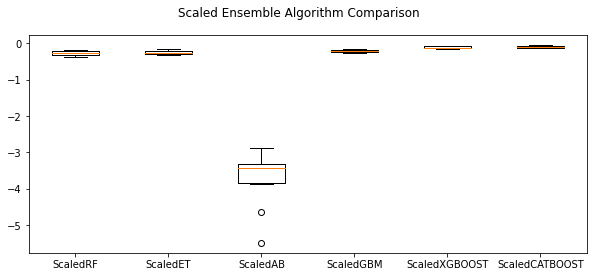

In [103]:
# Compare Algorithms
fig = plt.figure(figsize=(10,4))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [126]:
model = XGBRegressor()
#eval_set = [(X_test, y_test)]
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["rmse", "mae"], eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:16.92545	validation_0-mae:15.30363	validation_1-rmse:17.24585	validation_1-mae:15.57792
[1]	validation_0-rmse:12.00115	validation_0-mae:10.79101	validation_1-rmse:12.24583	validation_1-mae:10.97964
[2]	validation_0-rmse:8.53645	validation_0-mae:7.62107	validation_1-rmse:8.78219	validation_1-mae:7.82010
[3]	validation_0-rmse:6.08298	validation_0-mae:5.39823	validation_1-rmse:6.29692	validation_1-mae:5.55975
[4]	validation_0-rmse:4.34785	validation_0-mae:3.82587	validation_1-rmse:4.53485	validation_1-mae:3.96217
[5]	validation_0-rmse:3.12107	validation_0-mae:2.71569	validation_1-rmse:3.29587	validation_1-mae:2.84299
[6]	validation_0-rmse:2.25539	validation_0-mae:1.93629	validation_1-rmse:2.40500	validation_1-mae:2.05331
[7]	validation_0-rmse:1.64180	validation_0-mae:1.37828	validation_1-rmse:1.76685	validation_1-mae:1.47427
[8]	validation_0-rmse:1.21827	validation_0-mae:0.98458	validation_1-rmse:1.33187	validation_1-mae:1.07714
[9]	validation_0-rmse:0.92376	validati

[77]	validation_0-rmse:0.05639	validation_0-mae:0.03905	validation_1-rmse:0.37151	validation_1-mae:0.22545
[78]	validation_0-rmse:0.05511	validation_0-mae:0.03836	validation_1-rmse:0.37115	validation_1-mae:0.22535
[79]	validation_0-rmse:0.05442	validation_0-mae:0.03765	validation_1-rmse:0.37056	validation_1-mae:0.22520
[80]	validation_0-rmse:0.05362	validation_0-mae:0.03701	validation_1-rmse:0.37039	validation_1-mae:0.22511
[81]	validation_0-rmse:0.05315	validation_0-mae:0.03643	validation_1-rmse:0.37049	validation_1-mae:0.22484
[82]	validation_0-rmse:0.05280	validation_0-mae:0.03607	validation_1-rmse:0.37077	validation_1-mae:0.22486
[83]	validation_0-rmse:0.05202	validation_0-mae:0.03553	validation_1-rmse:0.37094	validation_1-mae:0.22497
[84]	validation_0-rmse:0.05106	validation_0-mae:0.03489	validation_1-rmse:0.37100	validation_1-mae:0.22497
[85]	validation_0-rmse:0.04977	validation_0-mae:0.03419	validation_1-rmse:0.37143	validation_1-mae:0.22522
[86]	validation_0-rmse:0.04884	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_squared_error(y_test, pred)
print("RMSE: ", rmse)
print("MAE : ", mae)

RMSE:  0.37121267629175037
MAE :  0.13779885103968384


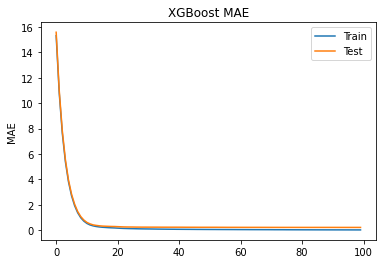

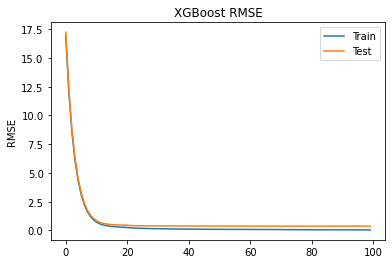

In [130]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
plt.ylabel('MAE')
plt.title('XGBoost MAE')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

### Analysis w.r.t cooling load

In [131]:
X = df.drop(['heating load', 'cooling load'], axis=1)
y = df['cooling load']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [83]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [84]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('LINEARSVR', LinearSVR()))

In [85]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -9.960233 (2.138059)
LASSO: -19.127470 (4.167670)
RIDGE: -10.315444 (2.070947)
EN: -17.732738 (3.614815)
KNN: -5.058900 (1.157407)
CART: -5.328106 (1.747432)
SVR: -27.872451 (5.468181)


c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\sv

LINEARSVR: -35.897115 (21.656971)


c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


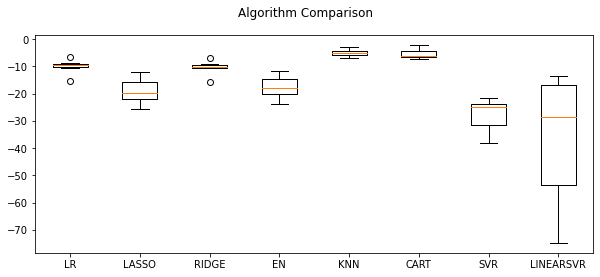

In [86]:
# Compare Algorithms
fig = plt.figure(figsize=(10,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [87]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE',
Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledLINEARSVR', Pipeline([('Scaler', StandardScaler()),('LINEARSVR',
LinearSVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: -10.224863 (2.339890)
ScaledLASSO: -12.978058 (2.710544)
ScaledRIDGE: -9.948201 (2.094413)
ScaledEN: -17.216006 (3.875293)
ScaledKNN: -7.081279 (1.923374)
ScaledCART: -5.235986 (1.521998)
ScaledSVR: -10.278307 (2.099599)
ScaledLINEARSVR: -11.220533 (3.077814)


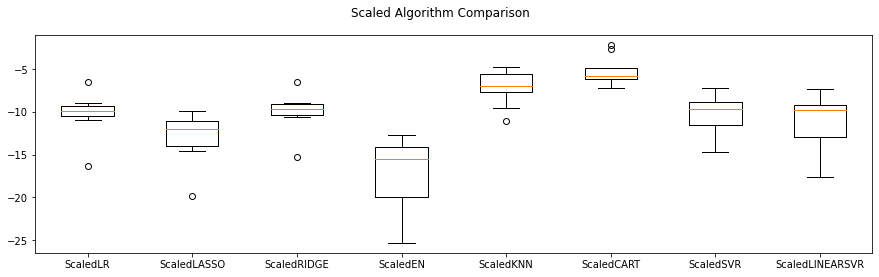

In [88]:
# Compare Algorithms
fig = plt.figure(figsize=(15, 4))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [89]:
# ensembles
ensembles = []
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledXGBOOST', Pipeline([('Scaler', StandardScaler()),('XGBOOST',
XGBRegressor())])))
ensembles.append(('ScaledCATBOOST', Pipeline([('Scaler', StandardScaler()),('CATBOOST',
CatBoostRegressor())])))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledRF: -3.153602 (1.019830)
ScaledET: -4.005032 (1.517477)
ScaledAB: -5.747260 (0.545037)
ScaledGBM: -2.548945 (0.525816)
ScaledXGBOOST: -1.020037 (0.457954)
Learning rate set to 0.034288
0:	learn: 9.1283631	total: 726us	remaining: 726ms
1:	learn: 8.8683015	total: 1.48ms	remaining: 738ms
2:	learn: 8.6322346	total: 2.21ms	remaining: 733ms
3:	learn: 8.3847991	total: 3.23ms	remaining: 805ms
4:	learn: 8.1655107	total: 3.75ms	remaining: 746ms
5:	learn: 7.9335633	total: 4.7ms	remaining: 778ms
6:	learn: 7.7333086	total: 5.3ms	remaining: 752ms
7:	learn: 7.5422640	total: 6.25ms	remaining: 775ms
8:	learn: 7.3306956	total: 7.09ms	remaining: 781ms
9:	learn: 7.1427259	total: 8.09ms	remaining: 801ms
10:	learn: 6.9651490	total: 9.05ms	remaining: 814ms
11:	learn: 6.7785369	total: 9.63ms	remaining: 793ms
12:	learn: 6.5928962	total: 10.2ms	remaining: 776ms
13:	learn: 6.4377653	total: 11.1ms	remaining: 782ms
14:	learn: 6.2653226	total: 11.8ms	remaining: 775ms
15:	learn: 6.1106606	total: 12.7ms	remaini

180:	learn: 1.2816135	total: 169ms	remaining: 763ms
181:	learn: 1.2786022	total: 170ms	remaining: 764ms
182:	learn: 1.2781160	total: 171ms	remaining: 763ms
183:	learn: 1.2755652	total: 172ms	remaining: 762ms
184:	learn: 1.2738879	total: 173ms	remaining: 760ms
185:	learn: 1.2725407	total: 173ms	remaining: 759ms
186:	learn: 1.2661610	total: 174ms	remaining: 758ms
187:	learn: 1.2640459	total: 175ms	remaining: 757ms
188:	learn: 1.2582821	total: 176ms	remaining: 756ms
189:	learn: 1.2566835	total: 177ms	remaining: 755ms
190:	learn: 1.2548355	total: 178ms	remaining: 755ms
191:	learn: 1.2536227	total: 179ms	remaining: 754ms
192:	learn: 1.2461660	total: 180ms	remaining: 753ms
193:	learn: 1.2443430	total: 181ms	remaining: 752ms
194:	learn: 1.2405967	total: 182ms	remaining: 751ms
195:	learn: 1.2382886	total: 183ms	remaining: 750ms
196:	learn: 1.2367227	total: 184ms	remaining: 749ms
197:	learn: 1.2312518	total: 185ms	remaining: 750ms
198:	learn: 1.2302018	total: 186ms	remaining: 749ms
199:	learn: 

340:	learn: 0.8082254	total: 304ms	remaining: 588ms
341:	learn: 0.8067740	total: 305ms	remaining: 587ms
342:	learn: 0.8058294	total: 306ms	remaining: 586ms
343:	learn: 0.8040099	total: 307ms	remaining: 586ms
344:	learn: 0.8001070	total: 308ms	remaining: 585ms
345:	learn: 0.7934992	total: 309ms	remaining: 584ms
346:	learn: 0.7885105	total: 310ms	remaining: 583ms
347:	learn: 0.7852018	total: 311ms	remaining: 582ms
348:	learn: 0.7843187	total: 311ms	remaining: 581ms
349:	learn: 0.7826475	total: 312ms	remaining: 580ms
350:	learn: 0.7815823	total: 313ms	remaining: 579ms
351:	learn: 0.7794264	total: 314ms	remaining: 578ms
352:	learn: 0.7780083	total: 315ms	remaining: 577ms
353:	learn: 0.7732868	total: 316ms	remaining: 576ms
354:	learn: 0.7706966	total: 317ms	remaining: 575ms
355:	learn: 0.7670867	total: 317ms	remaining: 574ms
356:	learn: 0.7657574	total: 319ms	remaining: 574ms
357:	learn: 0.7649297	total: 320ms	remaining: 574ms
358:	learn: 0.7627027	total: 321ms	remaining: 574ms
359:	learn: 

666:	learn: 0.4436647	total: 552ms	remaining: 276ms
667:	learn: 0.4432779	total: 553ms	remaining: 275ms
668:	learn: 0.4428038	total: 554ms	remaining: 274ms
669:	learn: 0.4423864	total: 555ms	remaining: 273ms
670:	learn: 0.4413857	total: 556ms	remaining: 273ms
671:	learn: 0.4409382	total: 557ms	remaining: 272ms
672:	learn: 0.4405982	total: 558ms	remaining: 271ms
673:	learn: 0.4401940	total: 559ms	remaining: 270ms
674:	learn: 0.4398033	total: 559ms	remaining: 269ms
675:	learn: 0.4395769	total: 560ms	remaining: 269ms
676:	learn: 0.4381834	total: 561ms	remaining: 268ms
677:	learn: 0.4377333	total: 562ms	remaining: 267ms
678:	learn: 0.4369060	total: 563ms	remaining: 266ms
679:	learn: 0.4365361	total: 564ms	remaining: 265ms
680:	learn: 0.4356872	total: 564ms	remaining: 264ms
681:	learn: 0.4352413	total: 565ms	remaining: 264ms
682:	learn: 0.4344907	total: 566ms	remaining: 263ms
683:	learn: 0.4342609	total: 567ms	remaining: 262ms
684:	learn: 0.4333266	total: 568ms	remaining: 261ms
685:	learn: 

971:	learn: 0.3250778	total: 810ms	remaining: 23.3ms
972:	learn: 0.3245374	total: 811ms	remaining: 22.5ms
973:	learn: 0.3241380	total: 812ms	remaining: 21.7ms
974:	learn: 0.3239397	total: 813ms	remaining: 20.8ms
975:	learn: 0.3235205	total: 814ms	remaining: 20ms
976:	learn: 0.3233471	total: 815ms	remaining: 19.2ms
977:	learn: 0.3232197	total: 816ms	remaining: 18.4ms
978:	learn: 0.3223375	total: 818ms	remaining: 17.5ms
979:	learn: 0.3219694	total: 819ms	remaining: 16.7ms
980:	learn: 0.3214349	total: 821ms	remaining: 15.9ms
981:	learn: 0.3212952	total: 822ms	remaining: 15.1ms
982:	learn: 0.3209072	total: 823ms	remaining: 14.2ms
983:	learn: 0.3205725	total: 825ms	remaining: 13.4ms
984:	learn: 0.3201131	total: 828ms	remaining: 12.6ms
985:	learn: 0.3196721	total: 829ms	remaining: 11.8ms
986:	learn: 0.3195780	total: 830ms	remaining: 10.9ms
987:	learn: 0.3194657	total: 832ms	remaining: 10.1ms
988:	learn: 0.3191467	total: 833ms	remaining: 9.27ms
989:	learn: 0.3188259	total: 835ms	remaining: 8.

139:	learn: 1.5403571	total: 138ms	remaining: 846ms
140:	learn: 1.5358875	total: 139ms	remaining: 844ms
141:	learn: 1.5328098	total: 140ms	remaining: 843ms
142:	learn: 1.5251526	total: 140ms	remaining: 842ms
143:	learn: 1.5147790	total: 141ms	remaining: 839ms
144:	learn: 1.5119615	total: 142ms	remaining: 838ms
145:	learn: 1.5108922	total: 143ms	remaining: 834ms
146:	learn: 1.5070488	total: 143ms	remaining: 832ms
147:	learn: 1.5043895	total: 144ms	remaining: 830ms
148:	learn: 1.5022636	total: 145ms	remaining: 827ms
149:	learn: 1.4864281	total: 146ms	remaining: 826ms
150:	learn: 1.4717189	total: 147ms	remaining: 824ms
151:	learn: 1.4652129	total: 147ms	remaining: 822ms
152:	learn: 1.4611160	total: 148ms	remaining: 820ms
153:	learn: 1.4565788	total: 149ms	remaining: 818ms
154:	learn: 1.4542836	total: 150ms	remaining: 816ms
155:	learn: 1.4511096	total: 151ms	remaining: 815ms
156:	learn: 1.4329445	total: 152ms	remaining: 816ms
157:	learn: 1.4294195	total: 153ms	remaining: 815ms
158:	learn: 

316:	learn: 0.9181194	total: 265ms	remaining: 571ms
317:	learn: 0.9171207	total: 266ms	remaining: 571ms
318:	learn: 0.9144445	total: 267ms	remaining: 571ms
319:	learn: 0.9073587	total: 269ms	remaining: 571ms
320:	learn: 0.9069061	total: 269ms	remaining: 570ms
321:	learn: 0.9064722	total: 270ms	remaining: 569ms
322:	learn: 0.9060671	total: 271ms	remaining: 569ms
323:	learn: 0.9018405	total: 272ms	remaining: 568ms
324:	learn: 0.8968948	total: 273ms	remaining: 568ms
325:	learn: 0.8950459	total: 274ms	remaining: 567ms
326:	learn: 0.8948807	total: 275ms	remaining: 566ms
327:	learn: 0.8944677	total: 276ms	remaining: 566ms
328:	learn: 0.8940093	total: 277ms	remaining: 565ms
329:	learn: 0.8931433	total: 278ms	remaining: 565ms
330:	learn: 0.8888494	total: 279ms	remaining: 564ms
331:	learn: 0.8855304	total: 280ms	remaining: 564ms
332:	learn: 0.8852280	total: 282ms	remaining: 565ms
333:	learn: 0.8830109	total: 283ms	remaining: 564ms
334:	learn: 0.8808894	total: 284ms	remaining: 564ms
335:	learn: 

578:	learn: 0.5432667	total: 520ms	remaining: 378ms
579:	learn: 0.5429702	total: 522ms	remaining: 378ms
580:	learn: 0.5424511	total: 523ms	remaining: 377ms
581:	learn: 0.5420957	total: 524ms	remaining: 376ms
582:	learn: 0.5409298	total: 525ms	remaining: 375ms
583:	learn: 0.5374035	total: 526ms	remaining: 375ms
584:	learn: 0.5370610	total: 527ms	remaining: 374ms
585:	learn: 0.5366906	total: 528ms	remaining: 373ms
586:	learn: 0.5357401	total: 529ms	remaining: 372ms
587:	learn: 0.5342477	total: 530ms	remaining: 371ms
588:	learn: 0.5341649	total: 531ms	remaining: 370ms
589:	learn: 0.5339525	total: 532ms	remaining: 370ms
590:	learn: 0.5314629	total: 533ms	remaining: 369ms
591:	learn: 0.5310727	total: 534ms	remaining: 368ms
592:	learn: 0.5308752	total: 535ms	remaining: 367ms
593:	learn: 0.5304423	total: 536ms	remaining: 366ms
594:	learn: 0.5301812	total: 537ms	remaining: 366ms
595:	learn: 0.5296190	total: 538ms	remaining: 365ms
596:	learn: 0.5290436	total: 539ms	remaining: 364ms
597:	learn: 

805:	learn: 0.4044052	total: 782ms	remaining: 188ms
806:	learn: 0.4040617	total: 783ms	remaining: 187ms
807:	learn: 0.4037484	total: 784ms	remaining: 186ms
808:	learn: 0.4029914	total: 786ms	remaining: 185ms
809:	learn: 0.4018764	total: 787ms	remaining: 185ms
810:	learn: 0.4015114	total: 788ms	remaining: 184ms
811:	learn: 0.4004548	total: 790ms	remaining: 183ms
812:	learn: 0.4002440	total: 792ms	remaining: 182ms
813:	learn: 0.4000236	total: 793ms	remaining: 181ms
814:	learn: 0.3997314	total: 794ms	remaining: 180ms
815:	learn: 0.3993504	total: 796ms	remaining: 179ms
816:	learn: 0.3989908	total: 797ms	remaining: 179ms
817:	learn: 0.3984166	total: 799ms	remaining: 178ms
818:	learn: 0.3982190	total: 800ms	remaining: 177ms
819:	learn: 0.3963847	total: 802ms	remaining: 176ms
820:	learn: 0.3961788	total: 804ms	remaining: 175ms
821:	learn: 0.3957079	total: 805ms	remaining: 174ms
822:	learn: 0.3954273	total: 806ms	remaining: 173ms
823:	learn: 0.3950731	total: 809ms	remaining: 173ms
824:	learn: 

Learning rate set to 0.034288
0:	learn: 9.2022356	total: 607us	remaining: 607ms
1:	learn: 8.9386534	total: 1.72ms	remaining: 857ms
2:	learn: 8.7002680	total: 2.33ms	remaining: 776ms
3:	learn: 8.4497194	total: 3.08ms	remaining: 767ms
4:	learn: 8.2280687	total: 3.61ms	remaining: 718ms
5:	learn: 7.9935630	total: 4.42ms	remaining: 733ms
6:	learn: 7.7911388	total: 5ms	remaining: 709ms
7:	learn: 7.5969470	total: 6.34ms	remaining: 786ms
8:	learn: 7.3828547	total: 7.56ms	remaining: 832ms
9:	learn: 7.1945926	total: 8.55ms	remaining: 847ms
10:	learn: 7.0140883	total: 9.45ms	remaining: 849ms
11:	learn: 6.8411164	total: 10.1ms	remaining: 831ms
12:	learn: 6.6811431	total: 10.8ms	remaining: 822ms
13:	learn: 6.5220096	total: 11.7ms	remaining: 823ms
14:	learn: 6.3457089	total: 12.4ms	remaining: 812ms
15:	learn: 6.1875632	total: 13.4ms	remaining: 827ms
16:	learn: 6.0290557	total: 14.5ms	remaining: 838ms
17:	learn: 5.8746286	total: 15.1ms	remaining: 824ms
18:	learn: 5.7293497	total: 15.7ms	remaining: 81

279:	learn: 1.0321299	total: 253ms	remaining: 650ms
280:	learn: 1.0295665	total: 254ms	remaining: 650ms
281:	learn: 1.0277755	total: 255ms	remaining: 649ms
282:	learn: 1.0269022	total: 256ms	remaining: 649ms
283:	learn: 1.0256490	total: 257ms	remaining: 648ms
284:	learn: 1.0239545	total: 258ms	remaining: 647ms
285:	learn: 1.0214004	total: 259ms	remaining: 647ms
286:	learn: 1.0210206	total: 260ms	remaining: 646ms
287:	learn: 1.0150772	total: 261ms	remaining: 645ms
288:	learn: 1.0142653	total: 262ms	remaining: 644ms
289:	learn: 1.0114610	total: 263ms	remaining: 643ms
290:	learn: 1.0072267	total: 264ms	remaining: 642ms
291:	learn: 1.0059034	total: 264ms	remaining: 641ms
292:	learn: 1.0043878	total: 265ms	remaining: 640ms
293:	learn: 0.9964771	total: 266ms	remaining: 639ms
294:	learn: 0.9946422	total: 267ms	remaining: 638ms
295:	learn: 0.9938911	total: 268ms	remaining: 637ms
296:	learn: 0.9916391	total: 269ms	remaining: 636ms
297:	learn: 0.9892240	total: 270ms	remaining: 635ms
298:	learn: 

587:	learn: 0.5412012	total: 524ms	remaining: 367ms
588:	learn: 0.5393983	total: 526ms	remaining: 367ms
589:	learn: 0.5375514	total: 527ms	remaining: 366ms
590:	learn: 0.5371142	total: 528ms	remaining: 366ms
591:	learn: 0.5362641	total: 530ms	remaining: 365ms
592:	learn: 0.5359129	total: 531ms	remaining: 364ms
593:	learn: 0.5353880	total: 531ms	remaining: 363ms
594:	learn: 0.5349706	total: 532ms	remaining: 362ms
595:	learn: 0.5345892	total: 533ms	remaining: 361ms
596:	learn: 0.5318589	total: 534ms	remaining: 361ms
597:	learn: 0.5302088	total: 535ms	remaining: 360ms
598:	learn: 0.5296596	total: 536ms	remaining: 359ms
599:	learn: 0.5294837	total: 537ms	remaining: 358ms
600:	learn: 0.5279295	total: 538ms	remaining: 357ms
601:	learn: 0.5267031	total: 539ms	remaining: 356ms
602:	learn: 0.5259209	total: 539ms	remaining: 355ms
603:	learn: 0.5255571	total: 540ms	remaining: 354ms
604:	learn: 0.5253078	total: 541ms	remaining: 353ms
605:	learn: 0.5250268	total: 542ms	remaining: 352ms
606:	learn: 

824:	learn: 0.3886509	total: 775ms	remaining: 164ms
825:	learn: 0.3881481	total: 777ms	remaining: 164ms
826:	learn: 0.3869735	total: 778ms	remaining: 163ms
827:	learn: 0.3867433	total: 780ms	remaining: 162ms
828:	learn: 0.3863348	total: 781ms	remaining: 161ms
829:	learn: 0.3857639	total: 782ms	remaining: 160ms
830:	learn: 0.3853671	total: 783ms	remaining: 159ms
831:	learn: 0.3848180	total: 784ms	remaining: 158ms
832:	learn: 0.3842465	total: 785ms	remaining: 157ms
833:	learn: 0.3833475	total: 786ms	remaining: 157ms
834:	learn: 0.3827591	total: 788ms	remaining: 156ms
835:	learn: 0.3826414	total: 789ms	remaining: 155ms
836:	learn: 0.3822784	total: 790ms	remaining: 154ms
837:	learn: 0.3810959	total: 791ms	remaining: 153ms
838:	learn: 0.3807070	total: 792ms	remaining: 152ms
839:	learn: 0.3798450	total: 793ms	remaining: 151ms
840:	learn: 0.3796795	total: 794ms	remaining: 150ms
841:	learn: 0.3792637	total: 795ms	remaining: 149ms
842:	learn: 0.3787359	total: 796ms	remaining: 148ms
843:	learn: 

Learning rate set to 0.034288
0:	learn: 9.0435695	total: 610us	remaining: 610ms
1:	learn: 8.7852206	total: 1.31ms	remaining: 656ms
2:	learn: 8.5500196	total: 2.13ms	remaining: 707ms
3:	learn: 8.3037631	total: 3.78ms	remaining: 942ms
4:	learn: 8.0790187	total: 4.78ms	remaining: 952ms
5:	learn: 7.8636110	total: 6.05ms	remaining: 1s
6:	learn: 7.6402683	total: 6.62ms	remaining: 939ms
7:	learn: 7.4361922	total: 7.47ms	remaining: 926ms
8:	learn: 7.2291192	total: 8.28ms	remaining: 912ms
9:	learn: 7.0284259	total: 9.26ms	remaining: 916ms
10:	learn: 6.8336517	total: 9.92ms	remaining: 892ms
11:	learn: 6.6657364	total: 10.9ms	remaining: 900ms
12:	learn: 6.4862182	total: 11.7ms	remaining: 885ms
13:	learn: 6.3128050	total: 12.6ms	remaining: 888ms
14:	learn: 6.1585086	total: 13.5ms	remaining: 886ms
15:	learn: 6.0096895	total: 14.2ms	remaining: 871ms
16:	learn: 5.8501356	total: 16ms	remaining: 925ms
17:	learn: 5.7006877	total: 16.8ms	remaining: 914ms
18:	learn: 5.5696404	total: 17.6ms	remaining: 909m

271:	learn: 0.9775386	total: 242ms	remaining: 648ms
272:	learn: 0.9750894	total: 243ms	remaining: 648ms
273:	learn: 0.9733798	total: 244ms	remaining: 647ms
274:	learn: 0.9721683	total: 245ms	remaining: 645ms
275:	learn: 0.9675584	total: 245ms	remaining: 644ms
276:	learn: 0.9636530	total: 246ms	remaining: 642ms
277:	learn: 0.9599495	total: 247ms	remaining: 641ms
278:	learn: 0.9574461	total: 247ms	remaining: 639ms
279:	learn: 0.9545044	total: 248ms	remaining: 638ms
280:	learn: 0.9517046	total: 249ms	remaining: 636ms
281:	learn: 0.9507237	total: 249ms	remaining: 635ms
282:	learn: 0.9499322	total: 250ms	remaining: 633ms
283:	learn: 0.9458045	total: 251ms	remaining: 632ms
284:	learn: 0.9449285	total: 251ms	remaining: 631ms
285:	learn: 0.9438826	total: 252ms	remaining: 630ms
286:	learn: 0.9418368	total: 253ms	remaining: 629ms
287:	learn: 0.9406930	total: 254ms	remaining: 628ms
288:	learn: 0.9390018	total: 255ms	remaining: 626ms
289:	learn: 0.9383231	total: 255ms	remaining: 625ms
290:	learn: 

435:	learn: 0.6542563	total: 366ms	remaining: 473ms
436:	learn: 0.6539843	total: 367ms	remaining: 472ms
437:	learn: 0.6536800	total: 368ms	remaining: 472ms
438:	learn: 0.6529650	total: 369ms	remaining: 471ms
439:	learn: 0.6516495	total: 369ms	remaining: 470ms
440:	learn: 0.6512279	total: 370ms	remaining: 469ms
441:	learn: 0.6501853	total: 371ms	remaining: 468ms
442:	learn: 0.6497874	total: 371ms	remaining: 467ms
443:	learn: 0.6495000	total: 372ms	remaining: 466ms
444:	learn: 0.6453325	total: 373ms	remaining: 465ms
445:	learn: 0.6449512	total: 373ms	remaining: 464ms
446:	learn: 0.6441099	total: 374ms	remaining: 463ms
447:	learn: 0.6407099	total: 375ms	remaining: 462ms
448:	learn: 0.6380692	total: 376ms	remaining: 461ms
449:	learn: 0.6378911	total: 377ms	remaining: 460ms
450:	learn: 0.6373648	total: 377ms	remaining: 459ms
451:	learn: 0.6370867	total: 378ms	remaining: 459ms
452:	learn: 0.6336259	total: 379ms	remaining: 458ms
453:	learn: 0.6309806	total: 380ms	remaining: 457ms
454:	learn: 

598:	learn: 0.4941808	total: 488ms	remaining: 327ms
599:	learn: 0.4929147	total: 489ms	remaining: 326ms
600:	learn: 0.4924272	total: 491ms	remaining: 326ms
601:	learn: 0.4905995	total: 493ms	remaining: 326ms
602:	learn: 0.4896495	total: 494ms	remaining: 325ms
603:	learn: 0.4891271	total: 496ms	remaining: 325ms
604:	learn: 0.4883322	total: 498ms	remaining: 325ms
605:	learn: 0.4865703	total: 500ms	remaining: 325ms
606:	learn: 0.4848727	total: 501ms	remaining: 324ms
607:	learn: 0.4841241	total: 502ms	remaining: 324ms
608:	learn: 0.4837959	total: 503ms	remaining: 323ms
609:	learn: 0.4834806	total: 504ms	remaining: 323ms
610:	learn: 0.4828227	total: 506ms	remaining: 322ms
611:	learn: 0.4825676	total: 508ms	remaining: 322ms
612:	learn: 0.4820158	total: 512ms	remaining: 323ms
613:	learn: 0.4811906	total: 513ms	remaining: 323ms
614:	learn: 0.4806770	total: 515ms	remaining: 322ms
615:	learn: 0.4801612	total: 516ms	remaining: 322ms
616:	learn: 0.4796833	total: 517ms	remaining: 321ms
617:	learn: 

767:	learn: 0.3950167	total: 620ms	remaining: 187ms
768:	learn: 0.3948010	total: 621ms	remaining: 186ms
769:	learn: 0.3944467	total: 621ms	remaining: 186ms
770:	learn: 0.3941405	total: 622ms	remaining: 185ms
771:	learn: 0.3937591	total: 623ms	remaining: 184ms
772:	learn: 0.3932315	total: 624ms	remaining: 183ms
773:	learn: 0.3922684	total: 625ms	remaining: 183ms
774:	learn: 0.3918330	total: 626ms	remaining: 182ms
775:	learn: 0.3914399	total: 627ms	remaining: 181ms
776:	learn: 0.3912456	total: 627ms	remaining: 180ms
777:	learn: 0.3910498	total: 628ms	remaining: 179ms
778:	learn: 0.3908455	total: 629ms	remaining: 178ms
779:	learn: 0.3902830	total: 630ms	remaining: 178ms
780:	learn: 0.3898846	total: 631ms	remaining: 177ms
781:	learn: 0.3895878	total: 631ms	remaining: 176ms
782:	learn: 0.3894433	total: 632ms	remaining: 175ms
783:	learn: 0.3893049	total: 633ms	remaining: 174ms
784:	learn: 0.3883406	total: 634ms	remaining: 174ms
785:	learn: 0.3881892	total: 635ms	remaining: 173ms
786:	learn: 

945:	learn: 0.3260866	total: 742ms	remaining: 42.4ms
946:	learn: 0.3257520	total: 743ms	remaining: 41.6ms
947:	learn: 0.3254297	total: 744ms	remaining: 40.8ms
948:	learn: 0.3252175	total: 745ms	remaining: 40ms
949:	learn: 0.3247846	total: 746ms	remaining: 39.3ms
950:	learn: 0.3243605	total: 747ms	remaining: 38.5ms
951:	learn: 0.3242644	total: 747ms	remaining: 37.7ms
952:	learn: 0.3239224	total: 748ms	remaining: 36.9ms
953:	learn: 0.3236856	total: 749ms	remaining: 36.1ms
954:	learn: 0.3235205	total: 750ms	remaining: 35.3ms
955:	learn: 0.3232374	total: 750ms	remaining: 34.5ms
956:	learn: 0.3230437	total: 751ms	remaining: 33.8ms
957:	learn: 0.3220968	total: 752ms	remaining: 33ms
958:	learn: 0.3218645	total: 753ms	remaining: 32.2ms
959:	learn: 0.3216157	total: 753ms	remaining: 31.4ms
960:	learn: 0.3213944	total: 754ms	remaining: 30.6ms
961:	learn: 0.3210442	total: 755ms	remaining: 29.8ms
962:	learn: 0.3208710	total: 756ms	remaining: 29ms
963:	learn: 0.3201692	total: 757ms	remaining: 28.3ms

190:	learn: 1.2693256	total: 119ms	remaining: 503ms
191:	learn: 1.2662724	total: 120ms	remaining: 503ms
192:	learn: 1.2599793	total: 120ms	remaining: 504ms
193:	learn: 1.2580103	total: 121ms	remaining: 505ms
194:	learn: 1.2516432	total: 122ms	remaining: 505ms
195:	learn: 1.2407772	total: 123ms	remaining: 505ms
196:	learn: 1.2306389	total: 124ms	remaining: 505ms
197:	learn: 1.2280767	total: 125ms	remaining: 504ms
198:	learn: 1.2238444	total: 125ms	remaining: 504ms
199:	learn: 1.2185992	total: 126ms	remaining: 504ms
200:	learn: 1.2165247	total: 127ms	remaining: 505ms
201:	learn: 1.2067976	total: 128ms	remaining: 505ms
202:	learn: 1.2008985	total: 129ms	remaining: 505ms
203:	learn: 1.1903278	total: 129ms	remaining: 505ms
204:	learn: 1.1864480	total: 130ms	remaining: 504ms
205:	learn: 1.1814071	total: 131ms	remaining: 504ms
206:	learn: 1.1727631	total: 132ms	remaining: 504ms
207:	learn: 1.1669681	total: 132ms	remaining: 504ms
208:	learn: 1.1628554	total: 133ms	remaining: 504ms
209:	learn: 

370:	learn: 0.7012268	total: 246ms	remaining: 417ms
371:	learn: 0.7003794	total: 247ms	remaining: 417ms
372:	learn: 0.6979662	total: 249ms	remaining: 418ms
373:	learn: 0.6966605	total: 250ms	remaining: 419ms
374:	learn: 0.6950881	total: 254ms	remaining: 424ms
375:	learn: 0.6943228	total: 266ms	remaining: 442ms
376:	learn: 0.6936790	total: 267ms	remaining: 442ms
377:	learn: 0.6923791	total: 269ms	remaining: 442ms
378:	learn: 0.6907946	total: 274ms	remaining: 449ms
379:	learn: 0.6895630	total: 275ms	remaining: 449ms
380:	learn: 0.6873183	total: 276ms	remaining: 449ms
381:	learn: 0.6870186	total: 278ms	remaining: 450ms
382:	learn: 0.6866186	total: 279ms	remaining: 450ms
383:	learn: 0.6854611	total: 281ms	remaining: 450ms
384:	learn: 0.6842378	total: 282ms	remaining: 450ms
385:	learn: 0.6831364	total: 283ms	remaining: 450ms
386:	learn: 0.6825567	total: 284ms	remaining: 450ms
387:	learn: 0.6822430	total: 285ms	remaining: 449ms
388:	learn: 0.6818985	total: 285ms	remaining: 448ms
389:	learn: 

684:	learn: 0.4451477	total: 512ms	remaining: 235ms
685:	learn: 0.4448801	total: 513ms	remaining: 235ms
686:	learn: 0.4444772	total: 514ms	remaining: 234ms
687:	learn: 0.4435676	total: 515ms	remaining: 234ms
688:	learn: 0.4425839	total: 516ms	remaining: 233ms
689:	learn: 0.4417108	total: 517ms	remaining: 232ms
690:	learn: 0.4414965	total: 518ms	remaining: 232ms
691:	learn: 0.4412606	total: 519ms	remaining: 231ms
692:	learn: 0.4405541	total: 520ms	remaining: 230ms
693:	learn: 0.4399452	total: 521ms	remaining: 230ms
694:	learn: 0.4395452	total: 522ms	remaining: 229ms
695:	learn: 0.4385401	total: 523ms	remaining: 229ms
696:	learn: 0.4379529	total: 524ms	remaining: 228ms
697:	learn: 0.4376384	total: 525ms	remaining: 227ms
698:	learn: 0.4362882	total: 526ms	remaining: 227ms
699:	learn: 0.4353298	total: 527ms	remaining: 226ms
700:	learn: 0.4337421	total: 528ms	remaining: 225ms
701:	learn: 0.4328290	total: 529ms	remaining: 225ms
702:	learn: 0.4313352	total: 530ms	remaining: 224ms
703:	learn: 

984:	learn: 0.3190687	total: 782ms	remaining: 11.9ms
985:	learn: 0.3188232	total: 783ms	remaining: 11.1ms
986:	learn: 0.3185930	total: 784ms	remaining: 10.3ms
987:	learn: 0.3183258	total: 785ms	remaining: 9.54ms
988:	learn: 0.3176679	total: 786ms	remaining: 8.74ms
989:	learn: 0.3171993	total: 787ms	remaining: 7.95ms
990:	learn: 0.3169332	total: 788ms	remaining: 7.16ms
991:	learn: 0.3168683	total: 789ms	remaining: 6.36ms
992:	learn: 0.3167208	total: 790ms	remaining: 5.57ms
993:	learn: 0.3162329	total: 791ms	remaining: 4.77ms
994:	learn: 0.3161121	total: 792ms	remaining: 3.98ms
995:	learn: 0.3156692	total: 793ms	remaining: 3.18ms
996:	learn: 0.3149833	total: 794ms	remaining: 2.39ms
997:	learn: 0.3145365	total: 795ms	remaining: 1.59ms
998:	learn: 0.3143381	total: 796ms	remaining: 796us
999:	learn: 0.3139622	total: 797ms	remaining: 0us
Learning rate set to 0.034288
0:	learn: 9.1436192	total: 738us	remaining: 737ms
1:	learn: 8.8813649	total: 1.71ms	remaining: 855ms
2:	learn: 8.6454754	total

155:	learn: 1.4295340	total: 116ms	remaining: 628ms
156:	learn: 1.4261470	total: 117ms	remaining: 629ms
157:	learn: 1.4232278	total: 118ms	remaining: 629ms
158:	learn: 1.4097614	total: 119ms	remaining: 630ms
159:	learn: 1.4043077	total: 120ms	remaining: 630ms
160:	learn: 1.4014324	total: 121ms	remaining: 629ms
161:	learn: 1.3989555	total: 122ms	remaining: 629ms
162:	learn: 1.3971737	total: 123ms	remaining: 629ms
163:	learn: 1.3914966	total: 123ms	remaining: 629ms
164:	learn: 1.3900511	total: 124ms	remaining: 628ms
165:	learn: 1.3888304	total: 125ms	remaining: 626ms
166:	learn: 1.3831485	total: 126ms	remaining: 627ms
167:	learn: 1.3814589	total: 126ms	remaining: 626ms
168:	learn: 1.3763649	total: 127ms	remaining: 626ms
169:	learn: 1.3699491	total: 128ms	remaining: 626ms
170:	learn: 1.3683742	total: 129ms	remaining: 625ms
171:	learn: 1.3679969	total: 130ms	remaining: 624ms
172:	learn: 1.3658200	total: 130ms	remaining: 624ms
173:	learn: 1.3608451	total: 131ms	remaining: 624ms
174:	learn: 

313:	learn: 0.9127851	total: 233ms	remaining: 510ms
314:	learn: 0.9124148	total: 234ms	remaining: 510ms
315:	learn: 0.9114228	total: 235ms	remaining: 509ms
316:	learn: 0.9104195	total: 236ms	remaining: 509ms
317:	learn: 0.9070205	total: 237ms	remaining: 509ms
318:	learn: 0.9050075	total: 238ms	remaining: 508ms
319:	learn: 0.9032922	total: 239ms	remaining: 508ms
320:	learn: 0.9015341	total: 240ms	remaining: 507ms
321:	learn: 0.9011534	total: 240ms	remaining: 506ms
322:	learn: 0.8988441	total: 241ms	remaining: 506ms
323:	learn: 0.8986549	total: 242ms	remaining: 505ms
324:	learn: 0.8978051	total: 243ms	remaining: 504ms
325:	learn: 0.8968890	total: 244ms	remaining: 504ms
326:	learn: 0.8950284	total: 245ms	remaining: 504ms
327:	learn: 0.8933051	total: 245ms	remaining: 503ms
328:	learn: 0.8920944	total: 246ms	remaining: 502ms
329:	learn: 0.8904806	total: 247ms	remaining: 502ms
330:	learn: 0.8894825	total: 248ms	remaining: 501ms
331:	learn: 0.8886448	total: 249ms	remaining: 501ms
332:	learn: 

492:	learn: 0.6742797	total: 366ms	remaining: 377ms
493:	learn: 0.6739200	total: 367ms	remaining: 376ms
494:	learn: 0.6737006	total: 368ms	remaining: 375ms
495:	learn: 0.6712888	total: 369ms	remaining: 375ms
496:	learn: 0.6708802	total: 370ms	remaining: 374ms
497:	learn: 0.6705317	total: 371ms	remaining: 374ms
498:	learn: 0.6689832	total: 372ms	remaining: 373ms
499:	learn: 0.6685663	total: 372ms	remaining: 372ms
500:	learn: 0.6672495	total: 373ms	remaining: 372ms
501:	learn: 0.6644968	total: 374ms	remaining: 371ms
502:	learn: 0.6638965	total: 374ms	remaining: 370ms
503:	learn: 0.6635537	total: 375ms	remaining: 369ms
504:	learn: 0.6632428	total: 376ms	remaining: 369ms
505:	learn: 0.6618040	total: 377ms	remaining: 368ms
506:	learn: 0.6611603	total: 378ms	remaining: 367ms
507:	learn: 0.6605855	total: 378ms	remaining: 366ms
508:	learn: 0.6593419	total: 379ms	remaining: 366ms
509:	learn: 0.6590439	total: 380ms	remaining: 365ms
510:	learn: 0.6585716	total: 381ms	remaining: 364ms
511:	learn: 

675:	learn: 0.5244945	total: 491ms	remaining: 235ms
676:	learn: 0.5242745	total: 492ms	remaining: 235ms
677:	learn: 0.5236195	total: 492ms	remaining: 234ms
678:	learn: 0.5234712	total: 493ms	remaining: 233ms
679:	learn: 0.5216692	total: 494ms	remaining: 233ms
680:	learn: 0.5207795	total: 495ms	remaining: 232ms
681:	learn: 0.5184259	total: 496ms	remaining: 231ms
682:	learn: 0.5170003	total: 496ms	remaining: 230ms
683:	learn: 0.5161596	total: 497ms	remaining: 230ms
684:	learn: 0.5156076	total: 498ms	remaining: 229ms
685:	learn: 0.5148035	total: 499ms	remaining: 228ms
686:	learn: 0.5141266	total: 499ms	remaining: 227ms
687:	learn: 0.5124631	total: 500ms	remaining: 227ms
688:	learn: 0.5122960	total: 501ms	remaining: 226ms
689:	learn: 0.5119898	total: 501ms	remaining: 225ms
690:	learn: 0.5115456	total: 502ms	remaining: 225ms
691:	learn: 0.5107716	total: 503ms	remaining: 224ms
692:	learn: 0.5095234	total: 504ms	remaining: 223ms
693:	learn: 0.5088055	total: 505ms	remaining: 223ms
694:	learn: 

857:	learn: 0.4190913	total: 613ms	remaining: 101ms
858:	learn: 0.4185129	total: 614ms	remaining: 101ms
859:	learn: 0.4181317	total: 615ms	remaining: 100ms
860:	learn: 0.4172884	total: 616ms	remaining: 99.4ms
861:	learn: 0.4158217	total: 617ms	remaining: 98.7ms
862:	learn: 0.4155329	total: 617ms	remaining: 98ms
863:	learn: 0.4150629	total: 618ms	remaining: 97.3ms
864:	learn: 0.4147035	total: 619ms	remaining: 96.6ms
865:	learn: 0.4144350	total: 619ms	remaining: 95.8ms
866:	learn: 0.4142995	total: 620ms	remaining: 95.1ms
867:	learn: 0.4139757	total: 621ms	remaining: 94.4ms
868:	learn: 0.4133378	total: 621ms	remaining: 93.7ms
869:	learn: 0.4127521	total: 622ms	remaining: 93ms
870:	learn: 0.4123556	total: 623ms	remaining: 92.3ms
871:	learn: 0.4119784	total: 624ms	remaining: 91.6ms
872:	learn: 0.4117173	total: 625ms	remaining: 90.9ms
873:	learn: 0.4113766	total: 625ms	remaining: 90.1ms
874:	learn: 0.4111261	total: 626ms	remaining: 89.5ms
875:	learn: 0.4109647	total: 627ms	remaining: 88.8ms


177:	learn: 1.2947195	total: 122ms	remaining: 563ms
178:	learn: 1.2792504	total: 123ms	remaining: 563ms
179:	learn: 1.2764701	total: 124ms	remaining: 564ms
180:	learn: 1.2694223	total: 125ms	remaining: 565ms
181:	learn: 1.2672869	total: 126ms	remaining: 565ms
182:	learn: 1.2619180	total: 127ms	remaining: 566ms
183:	learn: 1.2569045	total: 127ms	remaining: 565ms
184:	learn: 1.2548999	total: 128ms	remaining: 565ms
185:	learn: 1.2477196	total: 129ms	remaining: 565ms
186:	learn: 1.2416907	total: 130ms	remaining: 565ms
187:	learn: 1.2277082	total: 131ms	remaining: 564ms
188:	learn: 1.2179076	total: 132ms	remaining: 566ms
189:	learn: 1.2148679	total: 133ms	remaining: 566ms
190:	learn: 1.2123660	total: 134ms	remaining: 566ms
191:	learn: 1.2103684	total: 134ms	remaining: 566ms
192:	learn: 1.2078885	total: 135ms	remaining: 566ms
193:	learn: 1.2057523	total: 136ms	remaining: 565ms
194:	learn: 1.2039828	total: 137ms	remaining: 565ms
195:	learn: 1.2021231	total: 138ms	remaining: 565ms
196:	learn: 

342:	learn: 0.8385195	total: 241ms	remaining: 462ms
343:	learn: 0.8355822	total: 242ms	remaining: 462ms
344:	learn: 0.8338941	total: 243ms	remaining: 461ms
345:	learn: 0.8274975	total: 244ms	remaining: 461ms
346:	learn: 0.8221517	total: 245ms	remaining: 461ms
347:	learn: 0.8213379	total: 246ms	remaining: 460ms
348:	learn: 0.8152656	total: 247ms	remaining: 460ms
349:	learn: 0.8125548	total: 247ms	remaining: 459ms
350:	learn: 0.8067068	total: 248ms	remaining: 459ms
351:	learn: 0.8063332	total: 249ms	remaining: 458ms
352:	learn: 0.8049697	total: 249ms	remaining: 457ms
353:	learn: 0.8041982	total: 250ms	remaining: 457ms
354:	learn: 0.8024315	total: 251ms	remaining: 456ms
355:	learn: 0.7980837	total: 252ms	remaining: 456ms
356:	learn: 0.7971146	total: 253ms	remaining: 455ms
357:	learn: 0.7929549	total: 253ms	remaining: 454ms
358:	learn: 0.7925815	total: 254ms	remaining: 454ms
359:	learn: 0.7904785	total: 255ms	remaining: 453ms
360:	learn: 0.7895668	total: 256ms	remaining: 453ms
361:	learn: 

540:	learn: 0.5600712	total: 375ms	remaining: 318ms
541:	learn: 0.5595021	total: 376ms	remaining: 317ms
542:	learn: 0.5593454	total: 377ms	remaining: 317ms
543:	learn: 0.5581900	total: 377ms	remaining: 316ms
544:	learn: 0.5574343	total: 378ms	remaining: 316ms
545:	learn: 0.5565849	total: 379ms	remaining: 315ms
546:	learn: 0.5560491	total: 380ms	remaining: 315ms
547:	learn: 0.5559330	total: 381ms	remaining: 314ms
548:	learn: 0.5542115	total: 382ms	remaining: 314ms
549:	learn: 0.5530963	total: 383ms	remaining: 314ms
550:	learn: 0.5528606	total: 384ms	remaining: 313ms
551:	learn: 0.5512102	total: 385ms	remaining: 313ms
552:	learn: 0.5505069	total: 386ms	remaining: 312ms
553:	learn: 0.5494656	total: 387ms	remaining: 312ms
554:	learn: 0.5487479	total: 388ms	remaining: 311ms
555:	learn: 0.5486484	total: 388ms	remaining: 310ms
556:	learn: 0.5476583	total: 389ms	remaining: 309ms
557:	learn: 0.5469864	total: 390ms	remaining: 309ms
558:	learn: 0.5463025	total: 390ms	remaining: 308ms
559:	learn: 

702:	learn: 0.4471403	total: 490ms	remaining: 207ms
703:	learn: 0.4461290	total: 491ms	remaining: 206ms
704:	learn: 0.4453829	total: 492ms	remaining: 206ms
705:	learn: 0.4451139	total: 493ms	remaining: 205ms
706:	learn: 0.4446737	total: 494ms	remaining: 205ms
707:	learn: 0.4440650	total: 494ms	remaining: 204ms
708:	learn: 0.4439937	total: 495ms	remaining: 203ms
709:	learn: 0.4429982	total: 496ms	remaining: 203ms
710:	learn: 0.4428290	total: 497ms	remaining: 202ms
711:	learn: 0.4427459	total: 497ms	remaining: 201ms
712:	learn: 0.4423355	total: 498ms	remaining: 200ms
713:	learn: 0.4419833	total: 499ms	remaining: 200ms
714:	learn: 0.4415392	total: 500ms	remaining: 199ms
715:	learn: 0.4412213	total: 500ms	remaining: 198ms
716:	learn: 0.4409389	total: 501ms	remaining: 198ms
717:	learn: 0.4406735	total: 502ms	remaining: 197ms
718:	learn: 0.4404942	total: 503ms	remaining: 196ms
719:	learn: 0.4404135	total: 503ms	remaining: 196ms
720:	learn: 0.4397740	total: 504ms	remaining: 195ms
721:	learn: 

Learning rate set to 0.034301
0:	learn: 9.1857753	total: 649us	remaining: 649ms
1:	learn: 8.9215528	total: 1.54ms	remaining: 768ms
2:	learn: 8.6828301	total: 2.25ms	remaining: 749ms
3:	learn: 8.4327720	total: 3.36ms	remaining: 837ms
4:	learn: 8.2110142	total: 3.89ms	remaining: 775ms
5:	learn: 7.9767392	total: 4.9ms	remaining: 812ms
6:	learn: 7.7741664	total: 5.72ms	remaining: 812ms
7:	learn: 7.5801285	total: 6.75ms	remaining: 837ms
8:	learn: 7.3682619	total: 7.78ms	remaining: 857ms
9:	learn: 7.1803767	total: 9.16ms	remaining: 906ms
10:	learn: 6.9949033	total: 10.3ms	remaining: 925ms
11:	learn: 6.8056526	total: 10.8ms	remaining: 892ms
12:	learn: 6.6308673	total: 11.5ms	remaining: 873ms
13:	learn: 6.4731612	total: 12.2ms	remaining: 859ms
14:	learn: 6.2974496	total: 12.7ms	remaining: 835ms
15:	learn: 6.1404667	total: 13.4ms	remaining: 827ms
16:	learn: 5.9794568	total: 13.9ms	remaining: 805ms
17:	learn: 5.8311664	total: 14.5ms	remaining: 789ms
18:	learn: 5.6874608	total: 14.9ms	remaining: 

176:	learn: 1.3646716	total: 115ms	remaining: 536ms
177:	learn: 1.3563842	total: 116ms	remaining: 537ms
178:	learn: 1.3541865	total: 117ms	remaining: 538ms
179:	learn: 1.3518169	total: 119ms	remaining: 540ms
180:	learn: 1.3445106	total: 120ms	remaining: 543ms
181:	learn: 1.3416487	total: 121ms	remaining: 543ms
182:	learn: 1.3385417	total: 122ms	remaining: 543ms
183:	learn: 1.3332404	total: 122ms	remaining: 542ms
184:	learn: 1.3210553	total: 123ms	remaining: 542ms
185:	learn: 1.3145534	total: 124ms	remaining: 542ms
186:	learn: 1.3132231	total: 125ms	remaining: 542ms
187:	learn: 1.3074509	total: 126ms	remaining: 543ms
188:	learn: 1.3002535	total: 126ms	remaining: 543ms
189:	learn: 1.2979114	total: 127ms	remaining: 543ms
190:	learn: 1.2915467	total: 128ms	remaining: 542ms
191:	learn: 1.2888338	total: 129ms	remaining: 542ms
192:	learn: 1.2774648	total: 130ms	remaining: 542ms
193:	learn: 1.2755887	total: 131ms	remaining: 542ms
194:	learn: 1.2739191	total: 131ms	remaining: 542ms
195:	learn: 

347:	learn: 0.8387725	total: 232ms	remaining: 435ms
348:	learn: 0.8378286	total: 233ms	remaining: 434ms
349:	learn: 0.8366472	total: 234ms	remaining: 434ms
350:	learn: 0.8340413	total: 235ms	remaining: 434ms
351:	learn: 0.8331346	total: 236ms	remaining: 434ms
352:	learn: 0.8305355	total: 236ms	remaining: 433ms
353:	learn: 0.8299269	total: 237ms	remaining: 433ms
354:	learn: 0.8274463	total: 238ms	remaining: 432ms
355:	learn: 0.8245880	total: 238ms	remaining: 431ms
356:	learn: 0.8221464	total: 239ms	remaining: 431ms
357:	learn: 0.8178072	total: 240ms	remaining: 430ms
358:	learn: 0.8165347	total: 241ms	remaining: 430ms
359:	learn: 0.8141987	total: 241ms	remaining: 429ms
360:	learn: 0.8112997	total: 242ms	remaining: 429ms
361:	learn: 0.8101722	total: 243ms	remaining: 428ms
362:	learn: 0.8087986	total: 244ms	remaining: 428ms
363:	learn: 0.8082131	total: 245ms	remaining: 428ms
364:	learn: 0.8070539	total: 246ms	remaining: 427ms
365:	learn: 0.8057501	total: 246ms	remaining: 427ms
366:	learn: 

527:	learn: 0.5739146	total: 356ms	remaining: 318ms
528:	learn: 0.5718466	total: 357ms	remaining: 317ms
529:	learn: 0.5713839	total: 357ms	remaining: 317ms
530:	learn: 0.5710151	total: 359ms	remaining: 317ms
531:	learn: 0.5705062	total: 359ms	remaining: 316ms
532:	learn: 0.5697474	total: 360ms	remaining: 316ms
533:	learn: 0.5687137	total: 361ms	remaining: 315ms
534:	learn: 0.5681869	total: 362ms	remaining: 314ms
535:	learn: 0.5677837	total: 363ms	remaining: 314ms
536:	learn: 0.5674842	total: 364ms	remaining: 313ms
537:	learn: 0.5669488	total: 364ms	remaining: 313ms
538:	learn: 0.5656696	total: 365ms	remaining: 312ms
539:	learn: 0.5650445	total: 366ms	remaining: 312ms
540:	learn: 0.5644300	total: 367ms	remaining: 311ms
541:	learn: 0.5641226	total: 368ms	remaining: 311ms
542:	learn: 0.5634981	total: 369ms	remaining: 310ms
543:	learn: 0.5629604	total: 370ms	remaining: 310ms
544:	learn: 0.5609822	total: 371ms	remaining: 309ms
545:	learn: 0.5604946	total: 371ms	remaining: 309ms
546:	learn: 

846:	learn: 0.3644665	total: 607ms	remaining: 110ms
847:	learn: 0.3641720	total: 608ms	remaining: 109ms
848:	learn: 0.3638912	total: 608ms	remaining: 108ms
849:	learn: 0.3635165	total: 610ms	remaining: 108ms
850:	learn: 0.3633391	total: 610ms	remaining: 107ms
851:	learn: 0.3629492	total: 611ms	remaining: 106ms
852:	learn: 0.3626667	total: 612ms	remaining: 105ms
853:	learn: 0.3625598	total: 612ms	remaining: 105ms
854:	learn: 0.3615248	total: 613ms	remaining: 104ms
855:	learn: 0.3613120	total: 614ms	remaining: 103ms
856:	learn: 0.3604636	total: 615ms	remaining: 103ms
857:	learn: 0.3599014	total: 615ms	remaining: 102ms
858:	learn: 0.3597391	total: 616ms	remaining: 101ms
859:	learn: 0.3595344	total: 617ms	remaining: 100ms
860:	learn: 0.3585431	total: 618ms	remaining: 99.7ms
861:	learn: 0.3582327	total: 618ms	remaining: 99ms
862:	learn: 0.3579707	total: 619ms	remaining: 98.3ms
863:	learn: 0.3578184	total: 620ms	remaining: 97.6ms
864:	learn: 0.3565176	total: 621ms	remaining: 96.9ms
865:	lear

188:	learn: 1.2924487	total: 125ms	remaining: 538ms
189:	learn: 1.2829983	total: 126ms	remaining: 538ms
190:	learn: 1.2805363	total: 127ms	remaining: 539ms
191:	learn: 1.2785988	total: 128ms	remaining: 540ms
192:	learn: 1.2768471	total: 129ms	remaining: 540ms
193:	learn: 1.2751319	total: 130ms	remaining: 540ms
194:	learn: 1.2718998	total: 131ms	remaining: 540ms
195:	learn: 1.2676579	total: 132ms	remaining: 540ms
196:	learn: 1.2657867	total: 132ms	remaining: 540ms
197:	learn: 1.2617244	total: 133ms	remaining: 540ms
198:	learn: 1.2592170	total: 134ms	remaining: 540ms
199:	learn: 1.2552403	total: 135ms	remaining: 539ms
200:	learn: 1.2495540	total: 136ms	remaining: 539ms
201:	learn: 1.2464711	total: 136ms	remaining: 539ms
202:	learn: 1.2449884	total: 137ms	remaining: 539ms
203:	learn: 1.2389991	total: 138ms	remaining: 538ms
204:	learn: 1.2378182	total: 139ms	remaining: 538ms
205:	learn: 1.2369136	total: 139ms	remaining: 537ms
206:	learn: 1.2338569	total: 140ms	remaining: 537ms
207:	learn: 

531:	learn: 0.5899005	total: 385ms	remaining: 339ms
532:	learn: 0.5866955	total: 386ms	remaining: 338ms
533:	learn: 0.5864601	total: 387ms	remaining: 337ms
534:	learn: 0.5858326	total: 388ms	remaining: 337ms
535:	learn: 0.5854114	total: 389ms	remaining: 337ms
536:	learn: 0.5846237	total: 390ms	remaining: 336ms
537:	learn: 0.5828416	total: 391ms	remaining: 335ms
538:	learn: 0.5820733	total: 391ms	remaining: 335ms
539:	learn: 0.5788974	total: 392ms	remaining: 334ms
540:	learn: 0.5768634	total: 393ms	remaining: 333ms
541:	learn: 0.5765720	total: 394ms	remaining: 333ms
542:	learn: 0.5763402	total: 395ms	remaining: 332ms
543:	learn: 0.5760235	total: 395ms	remaining: 331ms
544:	learn: 0.5755045	total: 396ms	remaining: 331ms
545:	learn: 0.5751025	total: 397ms	remaining: 330ms
546:	learn: 0.5744867	total: 398ms	remaining: 330ms
547:	learn: 0.5725556	total: 399ms	remaining: 329ms
548:	learn: 0.5717445	total: 400ms	remaining: 329ms
549:	learn: 0.5695892	total: 401ms	remaining: 328ms
550:	learn: 

851:	learn: 0.3837558	total: 631ms	remaining: 110ms
852:	learn: 0.3835505	total: 632ms	remaining: 109ms
853:	learn: 0.3834643	total: 633ms	remaining: 108ms
854:	learn: 0.3833802	total: 634ms	remaining: 108ms
855:	learn: 0.3825237	total: 635ms	remaining: 107ms
856:	learn: 0.3822699	total: 636ms	remaining: 106ms
857:	learn: 0.3817890	total: 636ms	remaining: 105ms
858:	learn: 0.3815303	total: 637ms	remaining: 105ms
859:	learn: 0.3811175	total: 638ms	remaining: 104ms
860:	learn: 0.3808989	total: 639ms	remaining: 103ms
861:	learn: 0.3803262	total: 640ms	remaining: 102ms
862:	learn: 0.3802364	total: 640ms	remaining: 102ms
863:	learn: 0.3800192	total: 641ms	remaining: 101ms
864:	learn: 0.3793335	total: 642ms	remaining: 100ms
865:	learn: 0.3792425	total: 643ms	remaining: 99.4ms
866:	learn: 0.3788967	total: 643ms	remaining: 98.7ms
867:	learn: 0.3782659	total: 644ms	remaining: 98ms
868:	learn: 0.3780938	total: 645ms	remaining: 97.3ms
869:	learn: 0.3774949	total: 646ms	remaining: 96.5ms
870:	lear

178:	learn: 1.3316415	total: 119ms	remaining: 545ms
179:	learn: 1.3261766	total: 120ms	remaining: 545ms
180:	learn: 1.3216055	total: 121ms	remaining: 546ms
181:	learn: 1.3055489	total: 122ms	remaining: 546ms
182:	learn: 1.3036579	total: 122ms	remaining: 547ms
183:	learn: 1.2883385	total: 123ms	remaining: 546ms
184:	learn: 1.2854812	total: 124ms	remaining: 546ms
185:	learn: 1.2833459	total: 125ms	remaining: 545ms
186:	learn: 1.2815267	total: 125ms	remaining: 545ms
187:	learn: 1.2795312	total: 126ms	remaining: 545ms
188:	learn: 1.2692064	total: 127ms	remaining: 544ms
189:	learn: 1.2672365	total: 128ms	remaining: 544ms
190:	learn: 1.2602665	total: 128ms	remaining: 544ms
191:	learn: 1.2578505	total: 129ms	remaining: 543ms
192:	learn: 1.2434649	total: 130ms	remaining: 543ms
193:	learn: 1.2376663	total: 131ms	remaining: 543ms
194:	learn: 1.2337387	total: 131ms	remaining: 542ms
195:	learn: 1.2310655	total: 132ms	remaining: 542ms
196:	learn: 1.2257845	total: 133ms	remaining: 542ms
197:	learn: 

358:	learn: 0.7983901	total: 240ms	remaining: 428ms
359:	learn: 0.7976440	total: 241ms	remaining: 428ms
360:	learn: 0.7968418	total: 242ms	remaining: 427ms
361:	learn: 0.7952895	total: 242ms	remaining: 427ms
362:	learn: 0.7909911	total: 244ms	remaining: 427ms
363:	learn: 0.7898368	total: 244ms	remaining: 427ms
364:	learn: 0.7881001	total: 245ms	remaining: 426ms
365:	learn: 0.7877763	total: 246ms	remaining: 425ms
366:	learn: 0.7861067	total: 246ms	remaining: 425ms
367:	learn: 0.7854183	total: 247ms	remaining: 424ms
368:	learn: 0.7802514	total: 248ms	remaining: 424ms
369:	learn: 0.7779036	total: 248ms	remaining: 423ms
370:	learn: 0.7768901	total: 249ms	remaining: 423ms
371:	learn: 0.7754610	total: 250ms	remaining: 422ms
372:	learn: 0.7738224	total: 251ms	remaining: 422ms
373:	learn: 0.7735363	total: 252ms	remaining: 421ms
374:	learn: 0.7712310	total: 252ms	remaining: 421ms
375:	learn: 0.7701799	total: 253ms	remaining: 420ms
376:	learn: 0.7695032	total: 254ms	remaining: 420ms
377:	learn: 

551:	learn: 0.5487404	total: 366ms	remaining: 297ms
552:	learn: 0.5477226	total: 367ms	remaining: 297ms
553:	learn: 0.5475865	total: 368ms	remaining: 296ms
554:	learn: 0.5468498	total: 369ms	remaining: 296ms
555:	learn: 0.5461855	total: 370ms	remaining: 296ms
556:	learn: 0.5458411	total: 371ms	remaining: 295ms
557:	learn: 0.5456210	total: 372ms	remaining: 294ms
558:	learn: 0.5443938	total: 372ms	remaining: 294ms
559:	learn: 0.5440760	total: 373ms	remaining: 293ms
560:	learn: 0.5435052	total: 374ms	remaining: 292ms
561:	learn: 0.5432301	total: 374ms	remaining: 292ms
562:	learn: 0.5428581	total: 375ms	remaining: 291ms
563:	learn: 0.5426520	total: 376ms	remaining: 290ms
564:	learn: 0.5408030	total: 376ms	remaining: 290ms
565:	learn: 0.5394902	total: 377ms	remaining: 289ms
566:	learn: 0.5391806	total: 378ms	remaining: 289ms
567:	learn: 0.5369574	total: 379ms	remaining: 288ms
568:	learn: 0.5367777	total: 380ms	remaining: 287ms
569:	learn: 0.5359891	total: 380ms	remaining: 287ms
570:	learn: 

726:	learn: 0.4396251	total: 487ms	remaining: 183ms
727:	learn: 0.4386114	total: 488ms	remaining: 182ms
728:	learn: 0.4378915	total: 489ms	remaining: 182ms
729:	learn: 0.4377657	total: 490ms	remaining: 181ms
730:	learn: 0.4375625	total: 491ms	remaining: 181ms
731:	learn: 0.4367579	total: 492ms	remaining: 180ms
732:	learn: 0.4364205	total: 492ms	remaining: 179ms
733:	learn: 0.4360557	total: 493ms	remaining: 179ms
734:	learn: 0.4350804	total: 494ms	remaining: 178ms
735:	learn: 0.4348709	total: 495ms	remaining: 178ms
736:	learn: 0.4344863	total: 496ms	remaining: 177ms
737:	learn: 0.4337970	total: 497ms	remaining: 176ms
738:	learn: 0.4333857	total: 497ms	remaining: 176ms
739:	learn: 0.4320440	total: 498ms	remaining: 175ms
740:	learn: 0.4309427	total: 499ms	remaining: 174ms
741:	learn: 0.4305956	total: 500ms	remaining: 174ms
742:	learn: 0.4290668	total: 501ms	remaining: 173ms
743:	learn: 0.4288450	total: 502ms	remaining: 173ms
744:	learn: 0.4274570	total: 503ms	remaining: 172ms
745:	learn: 

999:	learn: 0.3167816	total: 734ms	remaining: 0us
ScaledCATBOOST: -0.687000 (0.224384)


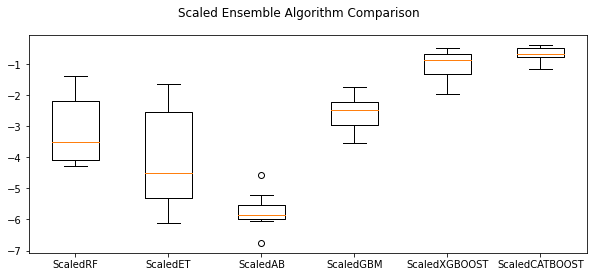

In [90]:
# Compare Algorithms
fig = plt.figure(figsize=(10,4))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [149]:
model = XGBRegressor()
#eval_set = [(X_test, y_test)]
#model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="rmse", eval_set=eval_set, verbose=True)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True)

[0]	validation_0-mae:16.91838	validation_0-rmse:18.27418	validation_1-mae:17.07686	validation_1-rmse:18.56624
[1]	validation_0-mae:11.90925	validation_0-rmse:12.99146	validation_1-mae:12.11822	validation_1-rmse:13.34401
[2]	validation_0-mae:8.41051	validation_0-rmse:9.29753	validation_1-mae:8.59497	validation_1-rmse:9.61105
[3]	validation_0-mae:5.94137	validation_0-rmse:6.70856	validation_1-mae:6.14404	validation_1-rmse:7.04602
[4]	validation_0-mae:4.20888	validation_0-rmse:4.91076	validation_1-mae:4.39131	validation_1-rmse:5.23414
[5]	validation_0-mae:2.98446	validation_0-rmse:3.67105	validation_1-mae:3.14162	validation_1-rmse:3.95673
[6]	validation_0-mae:2.16842	validation_0-rmse:2.83710	validation_1-mae:2.30553	validation_1-rmse:3.10009
[7]	validation_0-mae:1.65610	validation_0-rmse:2.28828	validation_1-mae:1.84398	validation_1-rmse:2.60185
[8]	validation_0-mae:1.34145	validation_0-rmse:1.94029	validation_1-mae:1.53316	validation_1-rmse:2.27183
[9]	validation_0-mae:1.14331	validatio

[77]	validation_0-mae:0.09699	validation_0-rmse:0.15617	validation_1-mae:0.62072	validation_1-rmse:0.95008
[78]	validation_0-mae:0.09475	validation_0-rmse:0.15376	validation_1-mae:0.61852	validation_1-rmse:0.94854
[79]	validation_0-mae:0.09362	validation_0-rmse:0.15210	validation_1-mae:0.61683	validation_1-rmse:0.94730
[80]	validation_0-mae:0.09212	validation_0-rmse:0.14920	validation_1-mae:0.61504	validation_1-rmse:0.94274
[81]	validation_0-mae:0.09145	validation_0-rmse:0.14805	validation_1-mae:0.61449	validation_1-rmse:0.94352
[82]	validation_0-mae:0.09075	validation_0-rmse:0.14728	validation_1-mae:0.61311	validation_1-rmse:0.94211
[83]	validation_0-mae:0.08874	validation_0-rmse:0.14287	validation_1-mae:0.61115	validation_1-rmse:0.93971
[84]	validation_0-mae:0.08765	validation_0-rmse:0.14080	validation_1-mae:0.60931	validation_1-rmse:0.93723
[85]	validation_0-mae:0.08656	validation_0-rmse:0.13962	validation_1-mae:0.60824	validation_1-rmse:0.93594
[86]	validation_0-mae:0.08596	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [147]:
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_squared_error(y_test, pred)
print("RMSE: ", rmse)
print("MAE : ", mae)

RMSE:  0.9170109882725503
MAE :  0.8409091526125995


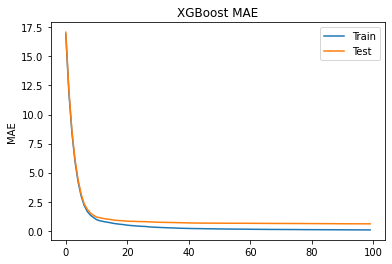

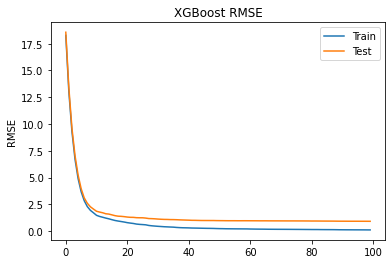

In [150]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
plt.ylabel('MAE')
plt.title('XGBoost MAE')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

In [144]:
epochs

100